In [1]:
#Hilfscode zum finden meines Arbeitsverzeichnis und der vorhanden Dateien
import os
print("Aktuelles Arbeitsverzeichnis:", os.getcwd())

input_dir = '/kaggle/input/'

for root, dirs, files in os.walk(input_dir):
    print(f"Verzeichnis: {root}")
    print(f"Unterordner: {dirs}")
    print(f"Dateien: {files}")
    print('---')

Aktuelles Arbeitsverzeichnis: /kaggle/working
Verzeichnis: /kaggle/input/
Unterordner: ['datasets-naivebayes']
Dateien: []
---
Verzeichnis: /kaggle/input/datasets-naivebayes
Unterordner: []
Dateien: ['dataset_base.xlsx', 'dataset.xlsx', 'dataset_roberta_sentences.xlsx', 'dataset_roberta_chunks.xlsx', 'dataset_finbert_sentences.xlsx', 'dataset_finbert_chunks.xlsx']
---


In [2]:
import pandas as pd
import numpy as np

print("Lade Datensätze...")

# Alle Datasets laden
df_data = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset.xlsx')
df_base = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_base.xlsx')
df_fin_sen = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_finbert_sentences.xlsx')
df_fin_chk = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_finbert_chunks.xlsx')
df_rob_sen = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_roberta_sentences.xlsx')
df_rob_chk = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset_roberta_chunks.xlsx')

# Date-Index setzen und One-Hot-Encoded columns konvertieren für alle DataFrames
for df in [df_data, df_base, df_fin_sen, df_fin_chk, df_rob_sen, df_rob_chk]:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df.set_index('Date', inplace=True)
    onehot_cols = ['Index_MDAX', 'Index_SDAX']
    df[onehot_cols] = df[onehot_cols].astype(np.float64)

print("✓ Alle Datensätze erfolgreich geladen!")
print(f"df_data: {df_data.shape}")
print(f"df_base: {df_base.shape}")
print(f"df_fin_sen: {df_fin_sen.shape}")
print(f"df_fin_chk: {df_fin_chk.shape}")
print(f"df_rob_sen: {df_rob_sen.shape}")
print(f"df_rob_chk: {df_rob_chk.shape}")


Lade Datensätze...
✓ Alle Datensätze erfolgreich geladen!
df_data: (69, 14)
df_base: (69, 10)
df_fin_sen: (69, 11)
df_fin_chk: (69, 11)
df_rob_sen: (69, 11)
df_rob_chk: (69, 11)


In [3]:
# Dictionary mit allen DataFrames
dataframes = {
    'df_data': df_data,
    'df_base': df_base,
    'df_fin_sen': df_fin_sen,
    'df_fin_chk': df_fin_chk,
    'df_rob_sen': df_rob_sen,
    'df_rob_chk': df_rob_chk
}

# Spaltennamen und Datentypen für jedes DataFrame anzeigen
for df_name, df in dataframes.items():
    print(f"\n{'='*50}")
    print(f"DATASET: {df_name}")
    print(f"Shape: {df.shape}")
    print(f"{'='*50}")
    
    # Spaltennamen und Datentypen anzeigen
    for col in df.columns:
        print(f"{col:<30} | {str(df[col].dtype)}")


DATASET: df_data
Shape: (69, 14)
Close_t-4                      | float64
Close_t-3                      | float64
Close_t-2                      | float64
Index_MDAX                     | float64
Index_SDAX                     | float64
Interest Rate_Old              | float64
Interest Rate_Change           | float64
FinBERT_Sentences              | float64
FinBERT_Chunks                 | float64
RoBERTa_Sentences              | float64
RoBERTa_Chunks                 | float64
Close                          | float64
Close_t+1                      | float64
Close_t+2                      | float64

DATASET: df_base
Shape: (69, 10)
Close_t-4                      | float64
Close_t-3                      | float64
Close_t-2                      | float64
Index_MDAX                     | float64
Index_SDAX                     | float64
Interest Rate_Old              | float64
Interest Rate_Change           | float64
Close                          | float64
Close_t+1                     

In [4]:
#AI SLOP?
import pandas as pd

# 1. Daten einlesen (falls nicht bereits geladen)
# df_data = pd.read_excel('/kaggle/input/datasets-naivebayes/dataset.xlsx', parse_dates=['Date'])
# df_data.set_index('Date', inplace=True)

# 2. MDAX und SDAX entfernen
df_num = df_data.drop(columns=['Index_MDAX', 'Index_SDAX'])

# 3. Deskriptive Statistik
desc = df_num.describe().T
desc['missing'] = df_num.isna().sum()
desc['median'] = df_num.median()
print("=== Deskriptive Statistik ===")
print(desc[['count','mean','median','std','min','25%','50%','75%','max','missing']])

# 4. Numerische Korrelationsmatrix
corr = df_num.corr()
print("\n=== Korrelationsmatrix ===")
print(corr)


=== Deskriptive Statistik ===
                      count      mean    median       std       min       25%  \
Close_t-4              69.0 -0.699813 -0.154771  2.157210 -5.343556 -1.462595   
Close_t-3              69.0 -0.455510 -0.351634  1.285509 -4.097239 -1.424465   
Close_t-2              69.0 -0.222135 -0.126968  1.423055 -5.793777 -0.688763   
Interest Rate_Old      69.0  2.836957  3.250000  1.300329 -0.500000  2.250000   
Interest Rate_Change   69.0  0.130435  0.000000  0.322583 -0.250000 -0.250000   
FinBERT_Sentences      69.0  0.030348  0.037000  0.085704 -0.117000 -0.032000   
FinBERT_Chunks         69.0 -0.113478 -0.126000  0.158278 -0.410000 -0.230000   
RoBERTa_Sentences      69.0 -0.030304 -0.036000  0.075406 -0.174000 -0.080000   
RoBERTa_Chunks         69.0 -0.081739 -0.085000  0.122289 -0.255000 -0.178000   
Close                  69.0  0.366660  0.230218  1.208468 -3.277755 -0.260367   
Close_t+1              69.0  0.267398  0.231406  1.510977 -3.922007 -0.576689  

# Visualisierungen Datensatz

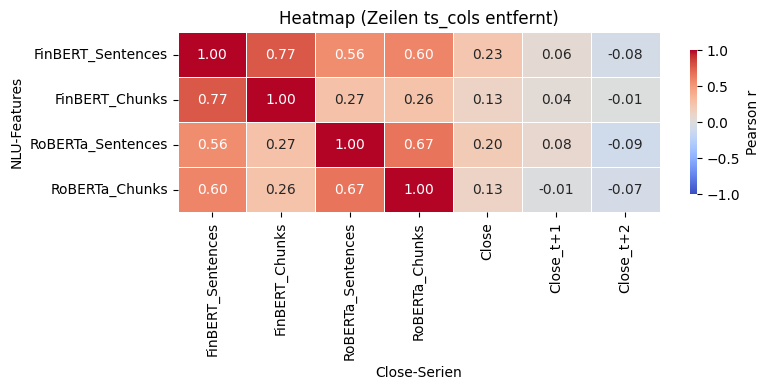

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Konfiguration
config = {
    # True  → nur Zeilen ts_cols löschen (Heatmap 1)
    # False → Zeilen ts_cols und Spalten nlp_cols löschen (Heatmap 2)
    'rows_only': True,
    'figsize': (8, 4),
    'cmap': 'coolwarm',
    'vmin': -1,
    'vmax': 1,
    'fmt': '.2f',
    'shrink': .8
}

# 1. Spalten definieren
nlp_cols = [
    'FinBERT_Sentences', 'FinBERT_Chunks',
    'RoBERTa_Sentences', 'RoBERTa_Chunks'
]
ts_cols  = ['Close', 'Close_t+1', 'Close_t+2']
all_cols = nlp_cols + ts_cols

# 2. DataFrame-Subset und Korrelationsmatrix
df_sub    = df_data[all_cols]
corr_full = df_sub.corr()

# 3. Auswahl der Heatmap
if config['rows_only']:
    # Variante 1: nur Zeilen löschen
    corr_plot = corr_full.drop(index=ts_cols, axis=0)
    title = 'Heatmap (Zeilen ts_cols entfernt)'
else:
    # Variante 2: Zeilen & Spalten löschen
    corr_plot = corr_full.drop(index=ts_cols, columns=nlp_cols)
    title = 'Heatmap (Zeilen ts_cols und Spalten nlp_cols entfernt)'

# 4. Heatmap plotten
plt.figure(figsize=config['figsize'])
sns.heatmap(
    corr_plot,
    annot=True,
    fmt=config['fmt'],
    cmap=config['cmap'],
    vmin=config['vmin'], vmax=config['vmax'],
    linewidths=0.5,
    cbar_kws={'shrink': config['shrink'], 'label': 'Pearson r'}
)
plt.title(title)
plt.ylabel('Features' if config['rows_only']==False else 'NLU-Features')
plt.xlabel('Close-Serien' if config['rows_only'] else 'Alle Features')
plt.tight_layout()
plt.show()


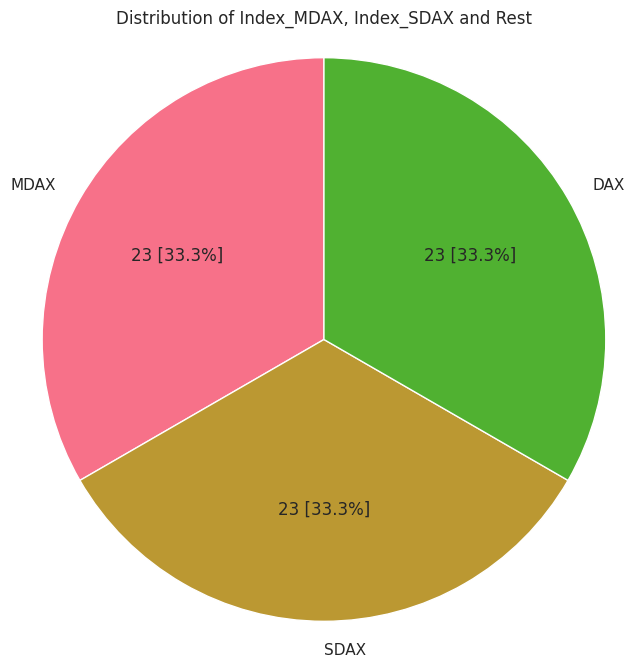

In [71]:
import matplotlib.pyplot as plt

# Calculate values for the pie chart
length_df = len(df_data)
sum_mdax = df_data['Index_MDAX'].sum()
sum_sdax = df_data['Index_SDAX'].sum()
rest = length_df - sum_mdax - sum_sdax

# Data for the pie chart
labels = ['MDAX', 'SDAX', 'DAX']
sizes = [sum_mdax, sum_sdax, rest]

# Create custom labels with absolute values and percentages
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val} [{pct:.1f}%]'
    return my_autopct

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=90)
plt.title('Distribution of Index_MDAX, Index_SDAX and Rest')
plt.axis('equal')  # Ensures a perfect circle
plt.show()


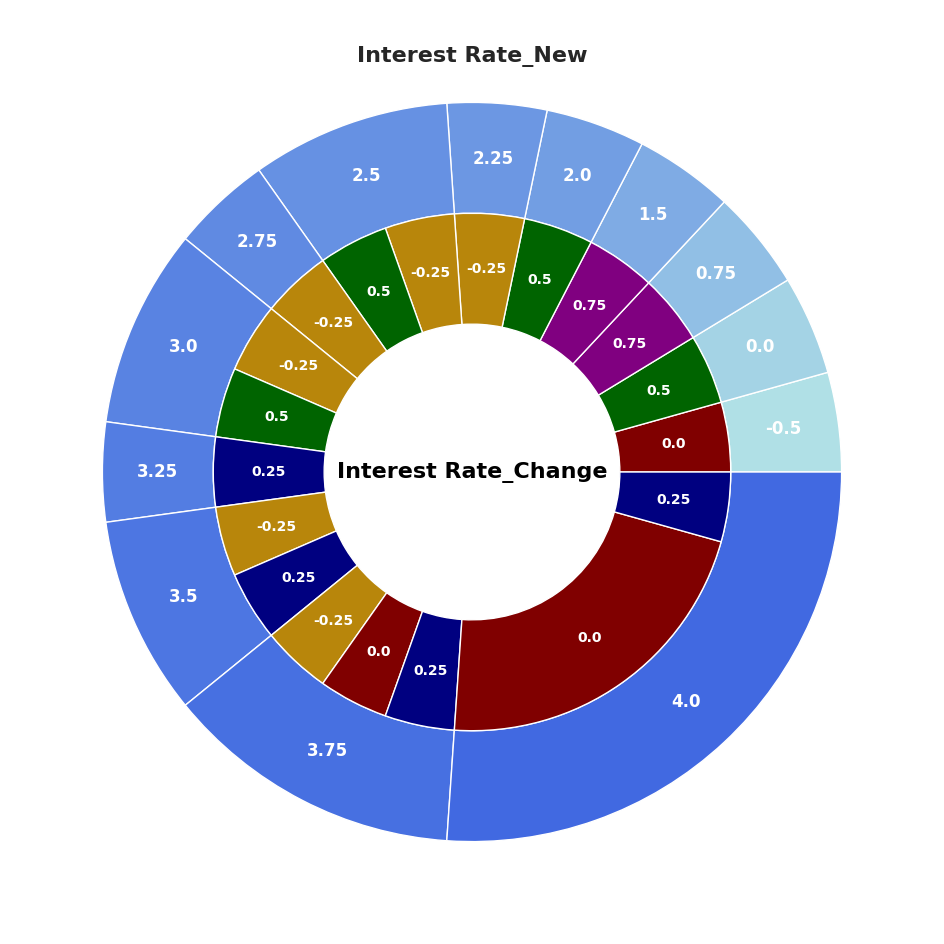

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Configuration dictionary
config = {
    'outer_ring_color_scale': {'min_value': -0.5, 'max_value': 4.0, 'color_min': '#B0E0E6', 'color_max': '#4169E1'},  # PowderBlue zu RoyalBlue
    'inner_ring_fixed_colors': {
    -0.25: '#B8860B',   # DarkGoldenrod (dunkles gold)
    0.0: '#800000',    # Maroon (dunkelrot)
    0.25: '#000080',   # Navy (dunkelblau)
    0.5: '#006400',    # DarkGreen (dunkelgrün)
    0.75: '#800080'    # Purple (dunkellila)
}



}

# Create combined data
combined_data = df_data[['Interest Rate_Old', 'Interest Rate_Change']].copy()

# Get data for both rings
outer_counts = combined_data['Interest Rate_Old'].value_counts().sort_index()
inner_sizes, inner_labels = [], []

for old_rate in outer_counts.index:
    subset = combined_data[combined_data['Interest Rate_Old'] == old_rate]
    change_counts = subset['Interest Rate_Change'].value_counts().sort_index()
    inner_sizes.extend(change_counts.values)
    inner_labels.extend(change_counts.index.astype(str))

# Create colormap for outer ring
cmap = mcolors.LinearSegmentedColormap.from_list('custom_scale', [config['outer_ring_color_scale']['color_min'], config['outer_ring_color_scale']['color_max']])
norm = mcolors.Normalize(vmin=config['outer_ring_color_scale']['min_value'], vmax=config['outer_ring_color_scale']['max_value'])
outer_colors = cmap(norm(outer_counts.index.astype(float)))

# Create colors for inner ring based on fixed color mapping
inner_colors = []
for label in inner_labels:
    value = float(label)
    if value in config['inner_ring_fixed_colors']:
        inner_colors.append(config['inner_ring_fixed_colors'][value])
    else:
        inner_colors.append('lightgray')  # Default color for unmapped values

# Setup plot
fig, ax = plt.subplots(figsize=(12, 12))
size = 0.3

# Create pies with colors
wedges_outer, _ = ax.pie(outer_counts.values, radius=1, labels=None, wedgeprops=dict(width=size, edgecolor='w'), colors=outer_colors)
wedges_inner, _ = ax.pie(inner_sizes, radius=1-size, labels=None, wedgeprops=dict(width=size, edgecolor='w'), colors=inner_colors)

# Add labels to rings
for wedges, labels, radius, fontsize in [(wedges_outer, outer_counts.index.astype(str), 1-size/2, 12), (wedges_inner, inner_labels, (1-size)-size/2, 10)]:
    for wedge, label in zip(wedges, labels):
        ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
        x = radius * np.cos(np.deg2rad(ang))
        y = radius * np.sin(np.deg2rad(ang))
        ax.text(x, y, label, ha='center', va='center', fontsize=fontsize, fontweight='bold', color='white')

# Add centered text and title
ax.text(0, 0, 'Interest Rate_Change', ha='center', va='center', fontsize=16, fontweight='bold', color='black')
ax.text(0.5, 0.95, 'Interest Rate_New', ha='center', va='center', fontsize=16, fontweight='bold', transform=ax.transAxes)
#plt.title('Interest Rate_New', fontsize=16, fontweight='bold')

ax.set(aspect='equal')
plt.show()


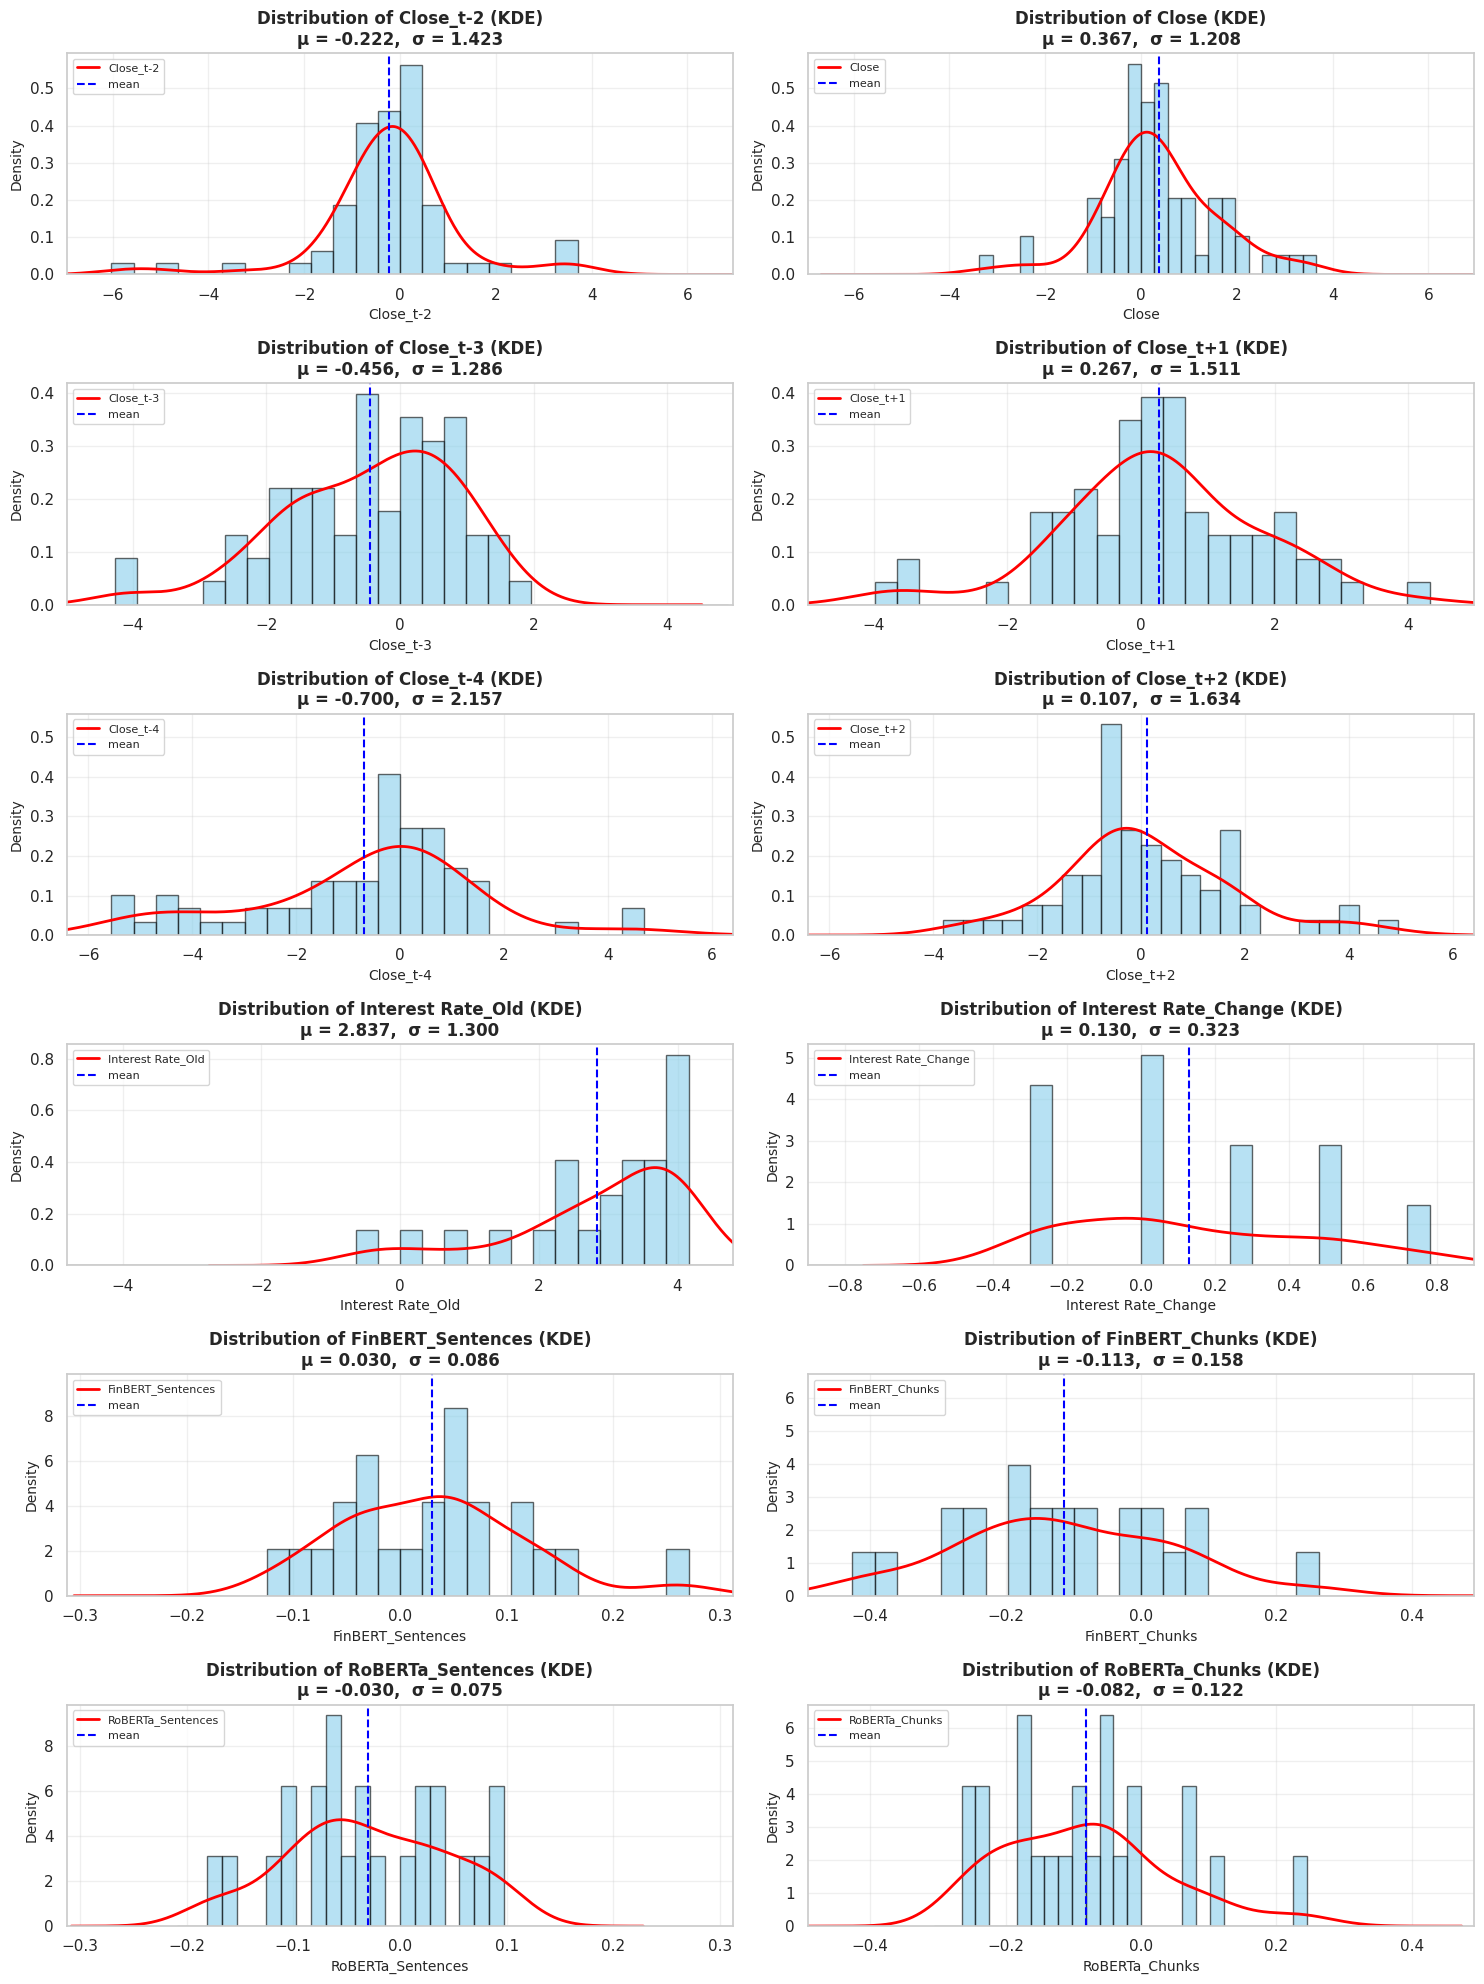

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# === KONFIGURATION ===
config = {
    'order':  [2, 9, 1, 10, 0, 11, 3, 4, 5, 6, 7, 8],
    'pairs':  [(0, 1), (2, 3), (4, 5), (8, 10), (9, 11)],
    'x_pad':  0.20,   # 20% Puffer um den größten Absolutwert
    'n_bins': 30      # Anzahl der Histogramm-Bins
}

# Spaltenliste ohne MDAX und SDAX
columns_all     = [c for c in df_data.columns if c not in ['Index_MDAX', 'Index_SDAX']]
columns_to_plot = [columns_all[i] for i in config['order']]

# Speicher für gepufferte X-Maxima und Y-Maxima jeder Achse
max_abs_vals = [0] * len(columns_to_plot)
max_y_vals   = [0] * len(columns_to_plot)

# === Erster Durchgang: Plots erzeugen, X- und Y-Maxima erfassen ===
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    data = df_data[col].dropna()
    μ = data.mean()
    σ = data.std()

    # X-Bereich mit Puffer berechnen
    raw_max = data.abs().max()
    pad     = raw_max * (1 + config['x_pad'])
    bins    = np.linspace(-pad, pad, config['n_bins'] + 1)
    max_abs_vals[i] = pad

    # Histogramm (Density)
    axes[i].hist(data, bins=bins, density=True, alpha=0.6,
                 color='skyblue', edgecolor='black')
    # KDE
    data.plot.kde(ax=axes[i], color='red', linewidth=2, bw_method='scott')

    # Mean-Linie, nur mit "mean" als Label
    axes[i].axvline(μ, color='blue', linestyle='--', linewidth=1.5, label='mean')

    # Titel bleibt unverändert
    axes[i].set_title(
        f'Distribution of {col} (KDE)\n'
        f'μ = {μ:.3f},  σ = {σ:.3f}',
        fontsize=12, fontweight='bold'
    )

    # Achsenbeschriftungen & Legende
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].legend(loc='upper left', fontsize=8)
    axes[i].grid(alpha=0.3)

    # Y-Maximum nach dem Zeichnen erfassen
    _, y_top = axes[i].get_ylim()
    max_y_vals[i] = y_top

# Überflüssige Achsen ausblenden
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# === Zweiter Durchgang: Gemeinsame X-Limits für Gruppen setzen ===
for group in config['pairs']:
    shared_x = max(max_abs_vals[idx] for idx in group if idx < len(axes))
    for idx in group:
        if idx < len(axes):
            axes[idx].set_xlim(-shared_x, shared_x)

# Übrige Achsen individuell symmetrisch setzen
ungrouped = set(range(len(columns_to_plot))) - set(i for grp in config['pairs'] for i in grp)
for idx in ungrouped:
    axes[idx].set_xlim(-max_abs_vals[idx], max_abs_vals[idx])

# === Dritter Durchgang: Gemeinsame Y-Limits für Gruppen setzen ===
for group in config['pairs']:
    shared_y = max(max_y_vals[idx] for idx in group if idx < len(axes))
    for idx in group:
        if idx < len(axes):
            axes[idx].set_ylim(0, shared_y)

plt.tight_layout()

# Save with white background
plt.savefig('/kaggle/working/distribution_plots.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig('/kaggle/working/distribution_plots_transparent.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()


Available columns after filtering: 9
Columns: ['Close_t-4', 'Close_t-3', 'Close_t-2', 'Interest Rate_Old', 'Interest Rate_Change', 'FinBERT_Sentences', 'Close', 'Close_t+1', 'Close_t+2']
X columns: []
Y columns: ['Close_t-4', 'Close_t-3', 'Close_t-2', 'Interest Rate_Old', 'Interest Rate_Change', 'FinBERT_Sentences']
⚠️ Adjusting indices due to insufficient columns...
Final X columns: ['Close', 'Close_t+1', 'Close_t+2']
Final Y columns: ['Close_t-4', 'Close_t-3', 'Close_t-2', 'Interest Rate_Old', 'Interest Rate_Change', 'FinBERT_Sentences']


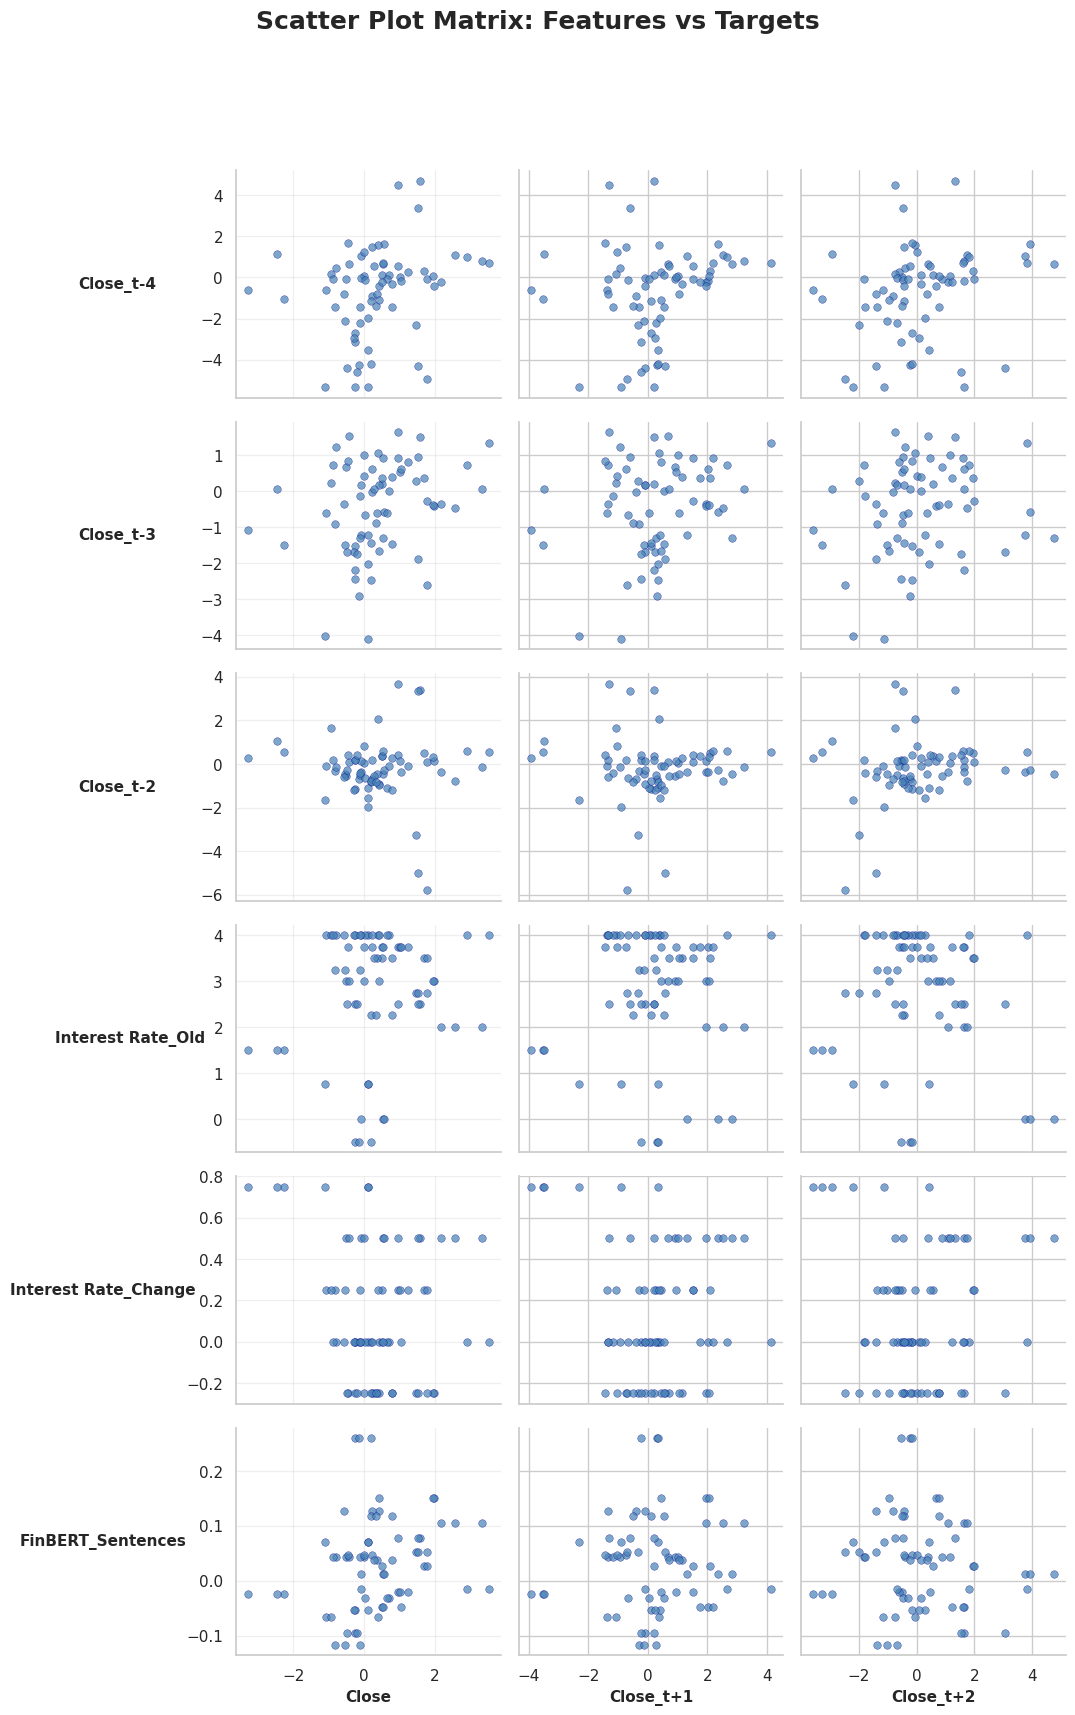

📁 Download files:


/kaggle/working/scatter_plot_matrix_white_XS.png

/kaggle/working/scatter_plot_matrix_transparent_XS.png

In [161]:
#PAIRPLOT XS
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Create directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# === CONFIGURATION ===
config = {
    'x_indices': [9, 10, 11],              # Column indices for X-axis (Targets)
    'y_indices': list(range(0, 6)),        # Column indices for Y-axis (Features)
    'excluded_columns': [
        'FinBERT_Chunks',
        'RoBERTa_Sentences', 
        'RoBERTa_Chunks'
    ],
    'height': 2.8,
    'aspect': 1.3,
    'scatter_kws': {
        's': 30,  # Dickere Punkte
        'alpha': 0.7, 
        'color': 'steelblue', 
        'edgecolor': 'darkblue', 
        'linewidth': 0.3
    },
    'style': 'whitegrid',
    'title_fontsize': 18,
    'label_fontsize': 11
}

# 1. DataFrame without MDAX/SDAX index columns AND excluded columns
df = df_data.loc[:, ~df_data.columns.str.startswith('Index_')]
df = df.loc[:, ~df.columns.isin(config['excluded_columns'])]

# 2. Complete column list AFTER filtering
columns_all = list(df.columns)

# Debug: Print available columns and their count
print(f"Available columns after filtering: {len(columns_all)}")
print(f"Columns: {columns_all}")

# 3. Get column names for configured indices - with safety check
x_cols = [columns_all[i] for i in config['x_indices'] if i < len(columns_all)]
y_cols = [columns_all[i] for i in config['y_indices'] if i < len(columns_all)]

# Debug: Check if we have valid columns
print(f"X columns: {x_cols}")
print(f"Y columns: {y_cols}")

# Safety check - if not enough columns, adjust indices
if not x_cols or not y_cols:
    print("⚠️ Adjusting indices due to insufficient columns...")
    # Take last 3 columns as x_cols (targets)
    x_cols = columns_all[-3:] if len(columns_all) >= 3 else columns_all[-len(columns_all):]
    # Take remaining columns as y_cols (features)
    y_cols = columns_all[:-3] if len(columns_all) > 3 else []
    
    if not y_cols:  # If still no y_cols, use first half
        mid = len(columns_all) // 2
        y_cols = columns_all[:mid]
        x_cols = columns_all[mid:]

print(f"Final X columns: {x_cols}")
print(f"Final Y columns: {y_cols}")

# 4. Create subset and drop NA
df_subset = df[x_cols + y_cols].dropna()

# 5. Set style and create PairGrid
sns.set_style(config['style'])
g = sns.PairGrid(
    df_subset,
    x_vars=x_cols,
    y_vars=y_cols,
    height=config['height'],
    aspect=config['aspect']
)

# Apply scatter plot with enhanced styling
g.map(sns.scatterplot, **config['scatter_kws'])

# Enhance axis labels with better formatting
for ax, feature in zip(g.axes.flatten()[::len(x_cols)], y_cols):
    ax.set_ylabel(feature, rotation=0, labelpad=60, va='center', 
                  fontsize=config['label_fontsize'], fontweight='bold')
    ax.grid(True, alpha=0.3)

for ax, target in zip(g.axes[-1], x_cols):
    ax.set_xlabel(target, fontsize=config['label_fontsize'], fontweight='bold')

# Add main title with better positioning
plt.suptitle('Scatter Plot Matrix: Features vs Targets', 
             fontsize=config['title_fontsize'], fontweight='bold', y=1.02)

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save with white background
plt.savefig('/kaggle/working/scatter_plot_matrix_white_XS.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig('/kaggle/working/scatter_plot_matrix_transparent_XS.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()

# Display download links
from IPython.display import FileLink, display
print("📁 Download files:")
display(FileLink('/kaggle/working/scatter_plot_matrix_white_XS.png'))
display(FileLink('/kaggle/working/scatter_plot_matrix_transparent_XS.png'))


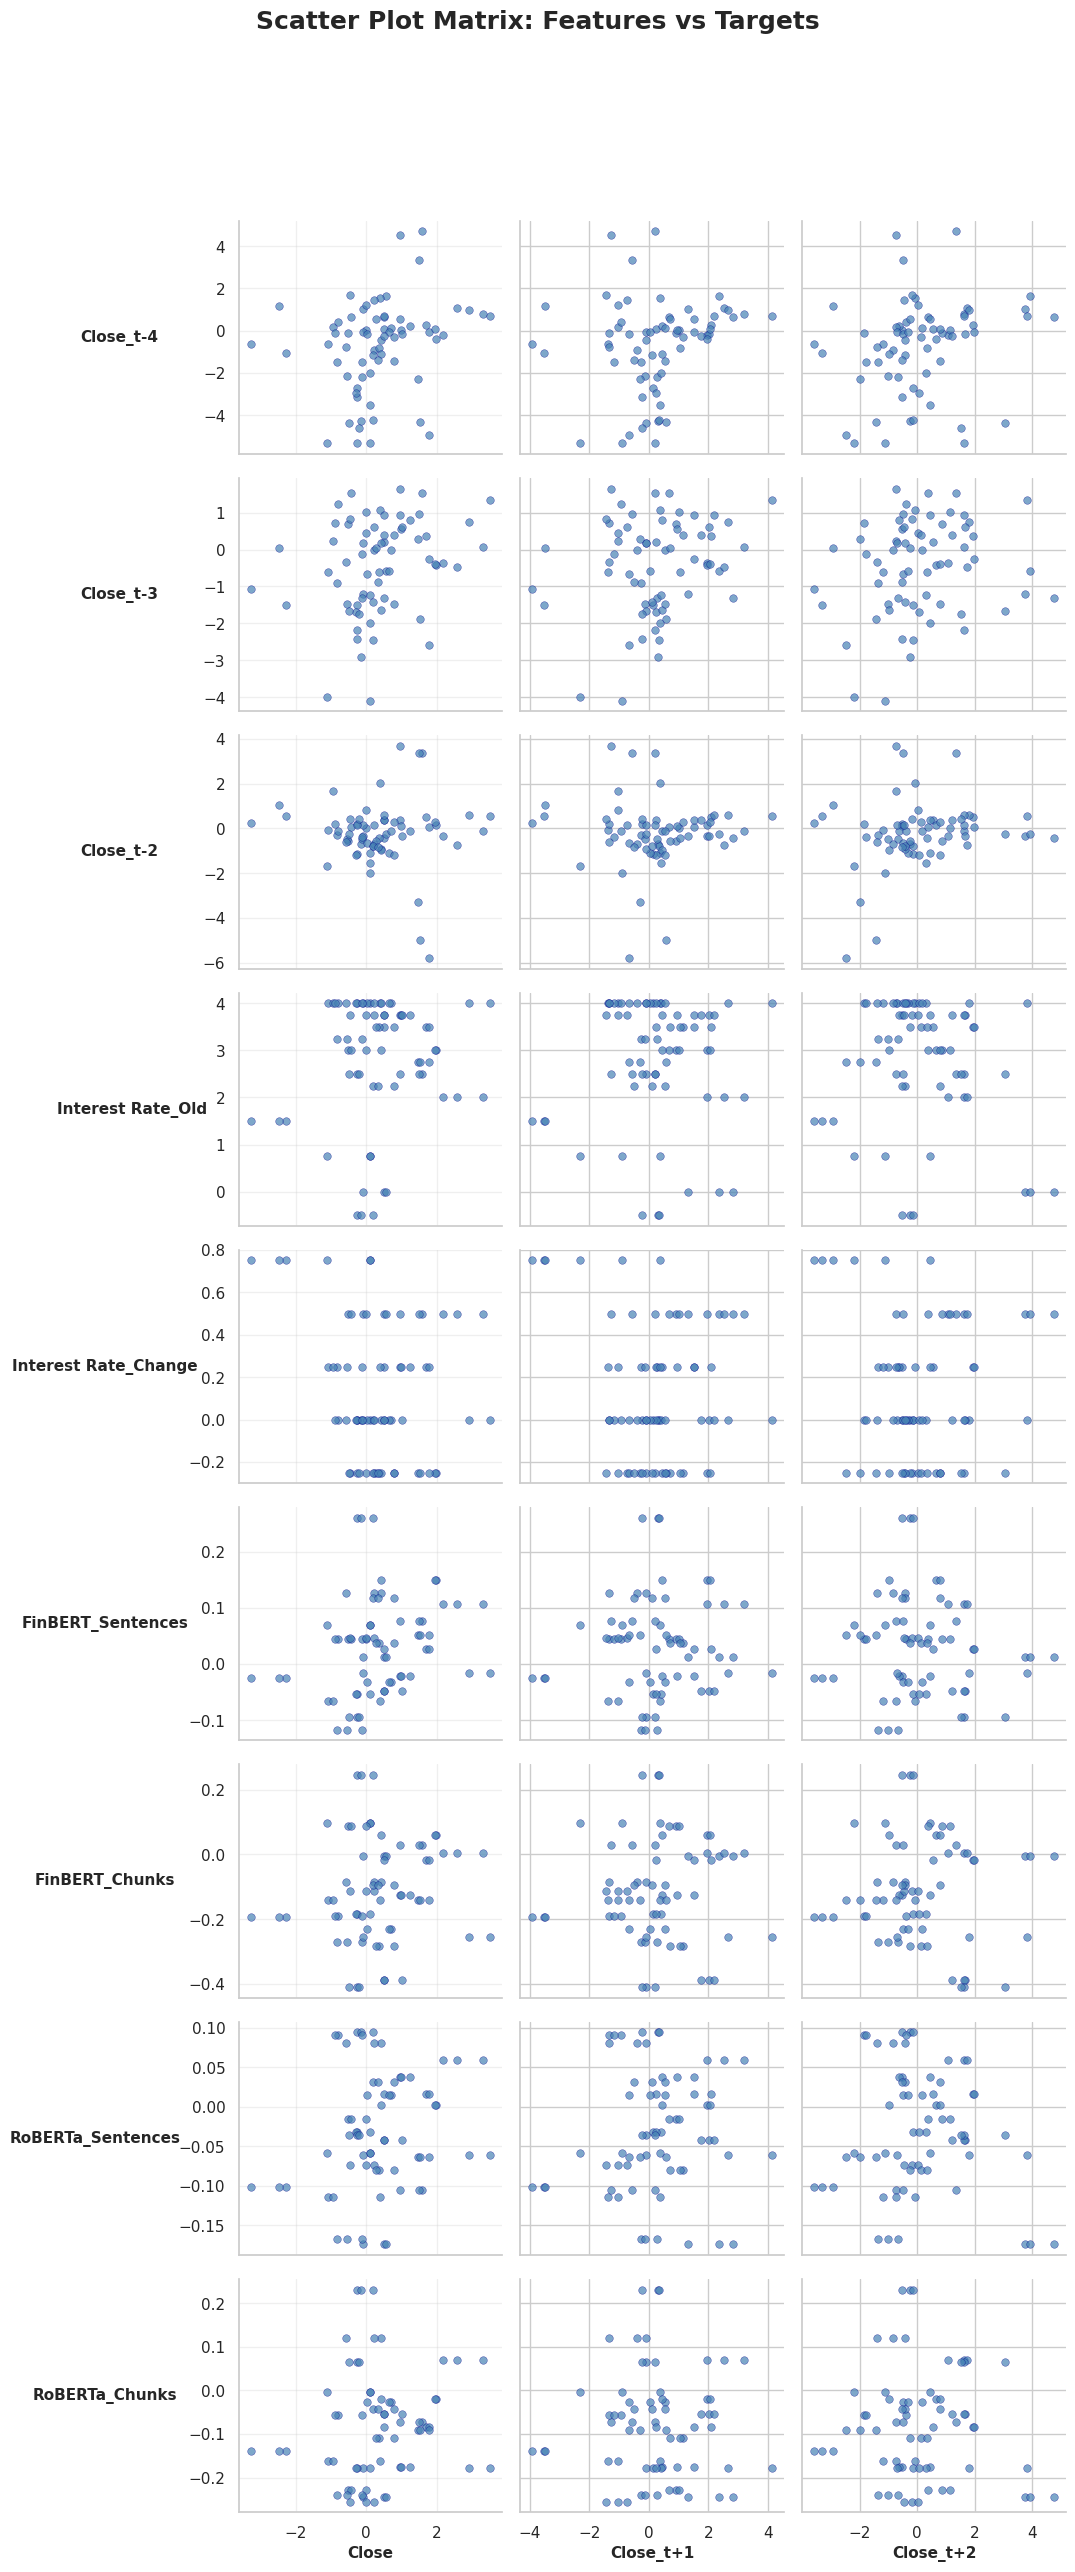

📁 Download files:


/kaggle/working/scatter_plot_matrix_white.png

/kaggle/working/scatter_plot_matrix_transparent.png

In [157]:
#PAIRPLOT 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Create directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# === CONFIGURATION ===
config = {
    'x_indices': [9, 10, 11],              # Column indices for X-axis (Targets)
    'y_indices': list(range(0, 9)),        # Column indices for Y-axis (Features)
    'height': 2.8,
    'aspect': 1.3,
    'scatter_kws': {
        's': 30, 
        'alpha': 0.7, 
        'color': 'steelblue', 
        'edgecolor': 'darkblue', 
        'linewidth': 0.3
    },
    'style': 'whitegrid',
    'title_fontsize': 18,
    'label_fontsize': 11
}

# 1. DataFrame without MDAX/SDAX index columns
df = df_data.loc[:, ~df_data.columns.str.startswith('Index_')]

# 2. Complete column list
columns_all = list(df.columns)

# 3. Get column names for configured indices
x_cols = [columns_all[i] for i in config['x_indices'] if i < len(columns_all)]
y_cols = [columns_all[i] for i in config['y_indices'] if i < len(columns_all)]

# 4. Create subset and drop NA
df_subset = df[x_cols + y_cols].dropna()

# 5. Set style and create PairGrid
sns.set_style(config['style'])
g = sns.PairGrid(
    df_subset,
    x_vars=x_cols,
    y_vars=y_cols,
    height=config['height'],
    aspect=config['aspect']
)

# Apply scatter plot with enhanced styling
g.map(sns.scatterplot, **config['scatter_kws'])

# Enhance axis labels with better formatting
for ax, feature in zip(g.axes.flatten()[::len(x_cols)], y_cols):
    ax.set_ylabel(feature, rotation=0, labelpad=60, va='center', 
                  fontsize=config['label_fontsize'], fontweight='bold')
    ax.grid(True, alpha=0.3)

for ax, target in zip(g.axes[-1], x_cols):
    ax.set_xlabel(target, fontsize=config['label_fontsize'], fontweight='bold')

# Add main title with better positioning
plt.suptitle('Scatter Plot Matrix: Features vs Targets', 
             fontsize=config['title_fontsize'], fontweight='bold', y=1.02)

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save with white background
plt.savefig('/kaggle/working/scatter_plot_matrix_white.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig('/kaggle/working/scatter_plot_matrix_transparent.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()

# Display download links
from IPython.display import FileLink, display
print("📁 Download files:")
display(FileLink('/kaggle/working/scatter_plot_matrix_white.png'))
display(FileLink('/kaggle/working/scatter_plot_matrix_transparent.png'))


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


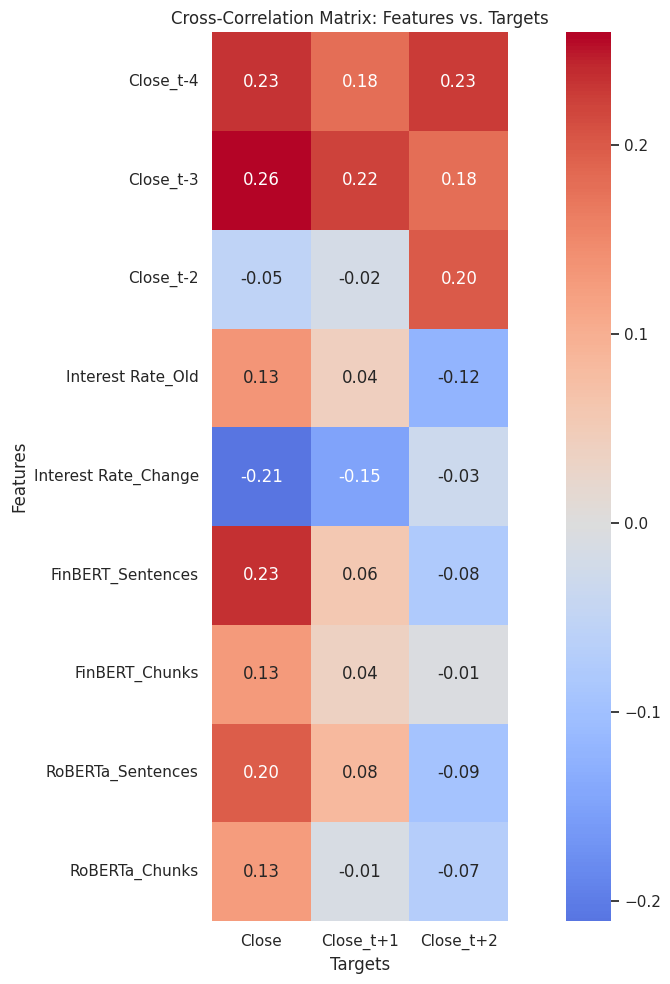

In [155]:
#HEAATMAP XS
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# === CONFIGURATION ===
config = {
    # Define the indices of columns (without 'Index_MDAX'/'Index_SDAX') 
    # to be displayed on X and Y axes:
    'x_indices': [9,10,11],         # e.g. columns 9, 10, 11 on X-axis
    'y_indices': [0,1,2,3,4,5,6,7,8],    # e.g. columns 0-8 on Y-axis
    'figsize': (12, 10),
    'cmap': 'coolwarm',
    'annot': True,
    'fmt': '.2f',
    'center': 0,
    'square': True
}

# 1. Original DataFrame without MDAX/SDAX index columns
df = df_data.loc[:, ~df_data.columns.str.startswith('Index_')]

# 2. Complete column list
columns_all = list(df.columns)

# 3. Get column names for configured indices
x_cols = [columns_all[i] for i in config['x_indices'] if i < len(columns_all)]
y_cols = [columns_all[i] for i in config['y_indices'] if i < len(columns_all)]

# 4. Create subset and calculate correlation
df_subset = df[x_cols + y_cols].dropna()
corr_matrix = df_subset.corr()
# Only cross-correlation Y vs. X
corr_xy = corr_matrix.loc[y_cols, x_cols]

# 5. Plot
plt.figure(figsize=config['figsize'])
sns.heatmap(
    corr_xy,
    annot=config['annot'],
    cmap=config['cmap'],
    center=config['center'],
    square=config['square'],
    fmt=config['fmt']
)
plt.xlabel("Targets")
plt.ylabel("Features")
plt.title("Cross-Correlation Matrix: Features vs. Targets")
plt.tight_layout()

# Save as PNG for download
plt.savefig('/kaggle/working/cross_correlation_heatmap.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')


# Save with transparent background
plt.savefig('/kaggle/working/cross_correlation_heatmap_transparent.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()



# Train/Test Split

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Konfiguration für Train/Test-Split
config = {
    'use_fixed_testset': False,
    'test_size': 15,
    'random_state': 33,
    'fixed_test_dates': [
        '2024-01-25',
        '2023-05-04',
        '2023-02-02',
        '2025-03-06',
        '2024-10-17'
    ]
}

# Train/Test Split auf Basis von df_base
if config['use_fixed_testset']:
    # Feste Testdaten
    test_dates = pd.to_datetime(config['fixed_test_dates'])
    test_set  = df_base.loc[df_base.index.isin(test_dates)]
    train_set = df_base.loc[~df_base.index.isin(test_dates)]
else:
    # Zufällige Auswahl mit ausgewogener Interest Rate_Change
    np.random.seed(config['random_state'])
    unique_dates = df_base.index.normalize().unique()
    n_dates = config['test_size'] // 3
    
    # Datumswerte nach Kategorien sammeln
    dates_zero = []
    dates_positive = []
    dates_negative = []
    
    for date in unique_dates:
        values = df_base.loc[df_base.index.normalize() == date, 'Interest Rate_Change']
        if (values == 0.00).any():
            dates_zero.append(date)
        if (values > 0.00).any():
            dates_positive.append(date)
        if (values < 0.00).any():
            dates_negative.append(date)
    
    # Je ein Datum aus jeder Kategorie + Rest zufällig
    selected_dates = []
    selected_dates.append(np.random.choice(dates_zero))
    selected_dates.append(np.random.choice(dates_positive))
    selected_dates.append(np.random.choice(dates_negative))
    
    # Restliche Datumswerte
    remaining = [d for d in unique_dates if d not in selected_dates]
    if n_dates > 3:
        additional = np.random.choice(remaining, size=n_dates-3, replace=False)
        selected_dates.extend(additional)
    
    test_set = df_base.loc[df_base.index.normalize().isin(selected_dates)]
    train_set = df_base.loc[~df_base.index.normalize().isin(selected_dates)]

print(f"Train-Set Shape: {train_set.shape}")
print(f"Test-Set  Shape: {test_set.shape}")


Train-Set Shape: (54, 10)
Test-Set  Shape: (15, 10)


In [178]:
#DATASETs erstellen
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Konfiguration für Train/Test-Split
config = {
    'use_fixed_testset': False,
    'test_size': 15,
    'random_state': 33,
    'fixed_test_dates': [
        '2024-01-25',
        '2023-05-04',
        '2023-02-02',
        '2025-03-06',
        '2024-10-17'
    ]
}

# Train/Test Split Logik (basierend auf df_base)
if config['use_fixed_testset']:
    test_dates = pd.to_datetime(config['fixed_test_dates'])
    test_indices = df_base.index.isin(test_dates)
    train_indices = ~test_indices
else:
    np.random.seed(config['random_state'])
    unique_dates = df_base.index.normalize().unique()
    n_dates = config['test_size'] // 3
    
    dates_zero = []
    dates_positive = []
    dates_negative = []
    
    for date in unique_dates:
        values = df_base.loc[df_base.index.normalize() == date, 'Interest Rate_Change']
        if (values == 0.00).any():
            dates_zero.append(date)
        if (values > 0.00).any():
            dates_positive.append(date)
        if (values < 0.00).any():
            dates_negative.append(date)
    
    selected_dates = []
    selected_dates.append(np.random.choice(dates_zero))
    selected_dates.append(np.random.choice(dates_positive))
    selected_dates.append(np.random.choice(dates_negative))
    
    remaining = [d for d in unique_dates if d not in selected_dates]
    if n_dates > 3:
        additional = np.random.choice(remaining, size=n_dates-3, replace=False)
        selected_dates.extend(additional)
    
    test_indices = df_base.index.normalize().isin(selected_dates)
    train_indices = ~test_indices

# Nur base und fin_sen DataFrames aufteilen
train_set = df_base.loc[train_indices]
test_set = df_base.loc[test_indices]

train_fin_sen = df_fin_sen.loc[train_indices]
test_fin_sen = df_fin_sen.loc[test_indices]

# Ausgabe der Shapes
datasets = [
    ('base', train_set, test_set),
    ('fin_sen', train_fin_sen, test_fin_sen)
]

for name, train, test in datasets:
    print(f"{name} - Train-Set Shape: {train.shape}")
    print(f"{name} - Test-Set  Shape: {test.shape}")


base - Train-Set Shape: (54, 10)
base - Test-Set  Shape: (15, 10)
fin_sen - Train-Set Shape: (54, 11)
fin_sen - Test-Set  Shape: (15, 11)


In [177]:
#base
import pandas as pd
from tabulate import tabulate

# --- Annahme: train_set und test_set sind bereits geladene DataFrames ---

# 1) Zusammenfassung: Instanzen & Interest Rate_Change
ir = 'Interest Rate_Change'
summary = pd.DataFrame({
    'Train': [
        len(train_set),
        f"{train_set[ir].gt(0).mean()*100:.1f}% ({train_set[ir].lt(0).mean()*100:.1f}%)"
    ],
    'Test': [
        len(test_set),
        f"{test_set[ir].gt(0).mean()*100:.1f}% ({test_set[ir].lt(0).mean()*100:.1f}%)"
    ]
}, index=['Instanzen', ir])

# 2) Kennzahlen für Zielvariablen
targets = ['Close', 'Close_t+1', 'Close_t+2']
metrics = pd.DataFrame({
    t: [
        f"{train_set[t].mean():.4f} [{test_set[t].mean():.4f}]",
        f"{train_set[t].std():.4f} [{test_set[t].std():.4f}]",
        f"{train_set[t].gt(0).mean()*100:.1f}% [{test_set[t].gt(0).mean()*100:.1f}%]",
        f"{train_set[t].le(0).mean()*100:.1f}% [{test_set[t].le(0).mean()*100:.1f}%]"
    ]
    for t in targets
}, index=['Mean', 'Std', '% Positive', '% Negative'])

# 3) Ausgabe
print(tabulate(summary.reset_index().values,
               headers=["", "Train", "Test"],
               tablefmt="github", stralign="center", numalign="center"))
print("\n" * 3, end="")
print(tabulate(metrics.reset_index().values,
               headers=["", *targets],
               tablefmt="github", stralign="center", numalign="center"))


|                      |     Train     |     Test      |
|----------------------|---------------|---------------|
|      Instanzen       |      54       |      15       |
| Interest Rate_Change | 44.4% (22.2%) | 40.0% (40.0%) |



|            |      Close      |    Close_t+1     |    Close_t+2     |
|------------|-----------------|------------------|------------------|
|    Mean    | 0.2847 [0.6615] | 0.3467 [-0.0181] | 0.2602 [-0.4431] |
|    Std     | 1.2676 [0.9443] | 1.5951 [1.1599]  | 1.6865 [1.3372]  |
| % Positive |  59.3% [66.7%]  |  63.0% [46.7%]   |  50.0% [33.3%]   |
| % Negative |  40.7% [33.3%]  |  37.0% [53.3%]   |  50.0% [66.7%]   |


In [180]:
#fin_sen
import pandas as pd
import numpy as np
from tabulate import tabulate

# --- Annahme: train_fin_sen und test_fin_sen sind bereits geladene DataFrames ---

# Variablen für die Zielvariablen
ir = 'Interest Rate_Change'
targets = ['Close', 'Close_t+1', 'Close_t+2']

# 1) Zusammenfassung: Instanzen & Interest Rate_Change mit for-Schleifen
datasets = {
    'Train_fin_sen': train_fin_sen,
    'Test_fin_sen': test_fin_sen
}

summary_data = {}
for name, df in datasets.items():
    summary_data[name] = [
        len(df),
        f"{df[ir].gt(0).mean()*100:.1f}% ({df[ir].lt(0).mean()*100:.1f}%)"
    ]

summary = pd.DataFrame(summary_data, index=['Instanzen', ir])

# 2) Kennzahlen für Zielvariablen mit for-Schleifen
metrics_data = {}
for target in targets:
    values = []
    
    # Sammle alle Werte für jede Metrik
    for metric in ['mean', 'std', 'positive', 'negative']:
        for name, df in datasets.items():
            if metric == 'mean':
                values.append(f"{df[target].mean():.4f}")
            elif metric == 'std':
                values.append(f"{df[target].std():.4f}")
            elif metric == 'positive':
                values.append(f"{df[target].gt(0).mean()*100:.1f}%")
            elif metric == 'negative':
                values.append(f"{df[target].le(0).mean()*100:.1f}%")
    
    # Kombiniere die Werte: [Train_fin_sen] [Test_fin_sen]
    metrics_data[target] = [
        f"{values[0]} [{values[1]}]",  # Mean
        f"{values[2]} [{values[3]}]",  # Std
        f"{values[4]} [{values[5]}]",  # % Positive
        f"{values[6]} [{values[7]}]"   # % Negative
    ]

metrics = pd.DataFrame(metrics_data, index=['Mean', 'Std', '% Positive', '% Negative'])

# 3) Ausgabe
print(tabulate(summary.reset_index().values,
               headers=["", "Train_fin_sen", "Test_fin_sen"],
               tablefmt="github", stralign="center", numalign="center"))
print("\n" * 3, end="")
print(tabulate(metrics.reset_index().values,
               headers=["", *targets],
               tablefmt="github", stralign="center", numalign="center"))


|                      |  Train_fin_sen  |  Test_fin_sen  |
|----------------------|-----------------|----------------|
|      Instanzen       |       54        |       15       |
| Interest Rate_Change |  44.4% (22.2%)  | 40.0% (40.0%)  |



|            |      Close      |    Close_t+1     |    Close_t+2     |
|------------|-----------------|------------------|------------------|
|    Mean    | 0.2847 [0.6615] | 0.3467 [-0.0181] | 0.2602 [-0.4431] |
|    Std     | 1.2676 [0.9443] | 1.5951 [1.1599]  | 1.6865 [1.3372]  |
| % Positive |  59.3% [66.7%]  |  63.0% [46.7%]   |  50.0% [33.3%]   |
| % Negative |  40.7% [33.3%]  |  37.0% [53.3%]   |  50.0% [66.7%]   |


# Anzeige Train/Testsatz

In [181]:
print("Train-Set:")
display(train_fin_sen)

print("\nTest-Set:")
display(test_fin_sen)


Train-Set:


Close_t-4  Close_t-3  Close_t-2  Index_MDAX  Index_SDAX  \
Date                                                                  
2022-07-21  -3.141550  -2.425617   0.198991         0.0         0.0   
2022-07-21  -4.265666  -2.903723  -0.677581         1.0         0.0   
2022-07-21  -4.213593  -2.455096  -0.800936         0.0         1.0   
2022-09-08   1.039798  -1.201536  -0.344767         0.0         0.0   
2022-09-08   0.663098  -1.308234  -0.444066         1.0         0.0   
2022-09-08   1.638908  -0.569039  -0.249987         0.0         1.0   
2022-10-27  -3.523164  -2.003363  -1.082541         0.0         0.0   
2022-10-27  -5.343556  -4.006108  -1.671129         1.0         0.0   
2022-10-27  -5.330521  -4.097239  -1.977422         0.0         1.0   
2022-12-15  -0.618802  -1.062019   0.260646         0.0         0.0   
2022-12-15  -1.046035  -1.498715   0.554400         1.0         0.0   
2022-12-15   1.149486   0.053585   1.070545         0.0         1.0   
2023-02-02  -0.202296  -0.360061  -0.345635         0.0         0.0   
2023-02-02   0.783296   0.066759  -0.126968         1.0         0.0   
2023-02-02   1.063652  -0.462428  -0.755975         0.0         1.0   
2023-03-16   4.701037   1.521588   3.376730         0.0         0.0   
2023-03-16   4.508688   1.648407   3.691726         1.0         0.0   
2023-03-16   3.355133   0.967583   3.371323         0.0         1.0   
2023-05-04  -0.092380   0.678594  -0.557190         0.0         0.0   
2023-05-04   0.632081   1.531997   0.077566         1.0         0.0   
2023-05-04   0.051210   1.013297   0.033140         0.0         1.0   
2023-06-15  -2.212952  -1.305394  -0.491147         0.0         0.0   
2023-06-15  -1.462595  -0.912139  -0.305002         1.0         0.0   
2023-06-15  -2.130272  -1.475975  -0.478899         0.0         1.0   
2023-10-26  -0.629256  -0.614148  -0.082191         0.0         0.0   
2023-10-26   0.176245   0.234397   1.665799         1.0         0.0   
2023-10-26   1.566632   1.070460   2.045344         0.0         1.0   
2023-12-14  -0.040737   0.169271   0.153226         0.0         0.0   
2023-12-14   0.997592   0.736350   0.587075         1.0         0.0   
2023-12-14   0.711467   1.341554   0.542664         0.0         1.0   
2024-01-25  -1.982188  -1.222978  -1.556135         0.0         0.0   
2024-01-25  -2.713103  -1.503866  -1.156179         1.0         0.0   
2024-01-25  -2.946387  -1.690091  -1.167064         0.0         1.0   
2024-03-07   0.103631  -0.003048  -0.103349         0.0         0.0   
2024-03-07  -0.150115  -0.659559  -0.628595         1.0         0.0   
2024-03-07  -0.070456  -0.589032  -1.106383         0.0         1.0   
2024-06-06  -0.419898   0.173450  -0.916777         0.0         0.0   
2024-06-06  -0.923098  -0.008270  -0.688763         1.0         0.0   
2024-06-06  -0.787371  -0.351634  -0.588068         0.0         1.0   
2024-09-12  -0.154771   0.618049  -0.351059         0.0         0.0   
2024-09-12  -0.235843   0.380511   0.371509         1.0         0.0   
2024-09-12   0.698722   0.931957   0.607013         0.0         1.0   
2024-10-17  -0.303507   0.388415   0.274690         0.0         0.0   
2024-10-17  -0.803045  -0.596620  -0.446374         1.0         0.0   
2024-10-17   0.531826   0.054476  -0.542032         0.0         1.0   
2025-01-30  -1.121200  -1.642285  -0.956440         0.0         0.0   
2025-01-30  -0.401925  -0.418558   0.158619         1.0         0.0   
2025-01-30   0.067861  -0.386782   0.309635         0.0         1.0   
2025-04-17  -4.396411  -1.671389  -0.268969         0.0         0.0   
2025-04-17  -5.308845  -2.175038   0.172745         1.0         0.0   
2025-04-17  -4.615226  -1.752020   0.411304         0.0         1.0   
2025-06-05  -1.149261  -1.424465  -0.761478         0.0         0.0   
2025-06-05  -1.403263  -0.882151  -0.826560         1.0         0.0   
2025-06-05  -1.420147  -1.472284  -1.183899         0.0         1.0   

            Interest Rate_Old  Inte


Test-Set:


Close_t-4  Close_t-3  Close_t-2  Index_MDAX  Index_SDAX  \
Date                                                                  
2023-07-27   0.283669   0.368782   0.496731         0.0         0.0   
2023-07-27  -0.078090  -0.269530   0.077807         1.0         0.0   
2023-07-27   0.101251   0.197088   0.359499         0.0         1.0   
2023-09-14   0.551104   0.938800   0.392870         0.0         0.0   
2023-09-14   0.017334   0.549010   0.125370         1.0         0.0   
2023-09-14   0.242864   0.804311  -0.106220         0.0         1.0   
2024-04-11   0.429567   1.224879  -0.113884         0.0         0.0   
2024-04-11  -0.092168   0.730216   0.194915         1.0         0.0   
2024-04-11  -1.462324  -0.129219  -0.402328         0.0         1.0   
2024-07-18   1.686147   0.833040   0.437862         0.0         0.0   
2024-07-18   1.457976   0.612095   0.175349         1.0         0.0   
2024-07-18   1.228602   0.440692   0.811003         0.0         1.0   
2025-03-06  -2.294525   0.285906  -3.267705         0.0         0.0   
2025-03-06  -4.921188  -2.594350  -5.793777         1.0         0.0   
2025-03-06  -4.318275  -1.891730  -5.009944         0.0         1.0   

            Interest Rate_Old  Interest Rate_Change  FinBERT_Sentences  \
Date                                                                     
2023-07-27               3.50                  0.25              0.026   
2023-07-27               3.50                  0.25              0.026   
2023-07-27               3.50                  0.25              0.026   
2023-09-14               3.75                  0.25             -0.021   
2023-09-14               3.75                  0.25             -0.021   
2023-09-14               3.75                  0.25             -0.021   
2024-04-11               4.00                  0.00              0.044   
2024-04-11               4.00                  0.00              0.044   
2024-04-11               4.00                  0.00              0.044   
2024-07-18               3.75                 -0.25              0.047   
2024-07-18               3.75                 -0.25              0.047   
2024-07-18               3.75                 -0.25              0.047   
2025-03-06               2.75                 -0.25              0.052   
2025-03-06               2.75                 -0.25              0.052   
2025-03-06               2.75                 -0.25              0.052   

               Close  Close_t+1  Close_t+2  
Date                                        
2023-07-27  1.702078   2.097082   1.955000  
2023-07-27  1.785418   1.524412   1.987185  
2023-07-27  0.500695   0.228546   0.556807  
2023-09-14  0.966269   1.529957   0.466909  
2023-09-14  0.998117   0.961341  -0.520588  
2023-09-14  1.235321   0.447257  -0.613790  
2024-04-11 -0.789178  -0.922679  -0.390777  
2024-04-11 -0.878917  -1.347923  -1.829327  
2024-04-11 -0.113721  -1.167655  -1.790262  
2024-07-18 -0.447679  -1.439311  -0.163961  
2024-07-18  0.217257  -0.738447  -0.445285  
2024-07-18 -0.011925  -1.028212   0.026539  
2025-03-06  1.466356  -0.312334  -1.993325  
2025-03-06  1.768866  -0.681514  -2.472286  
2025-03-06  1.524211   0.578636  -1.419426

# Visualisierungen Train/Test

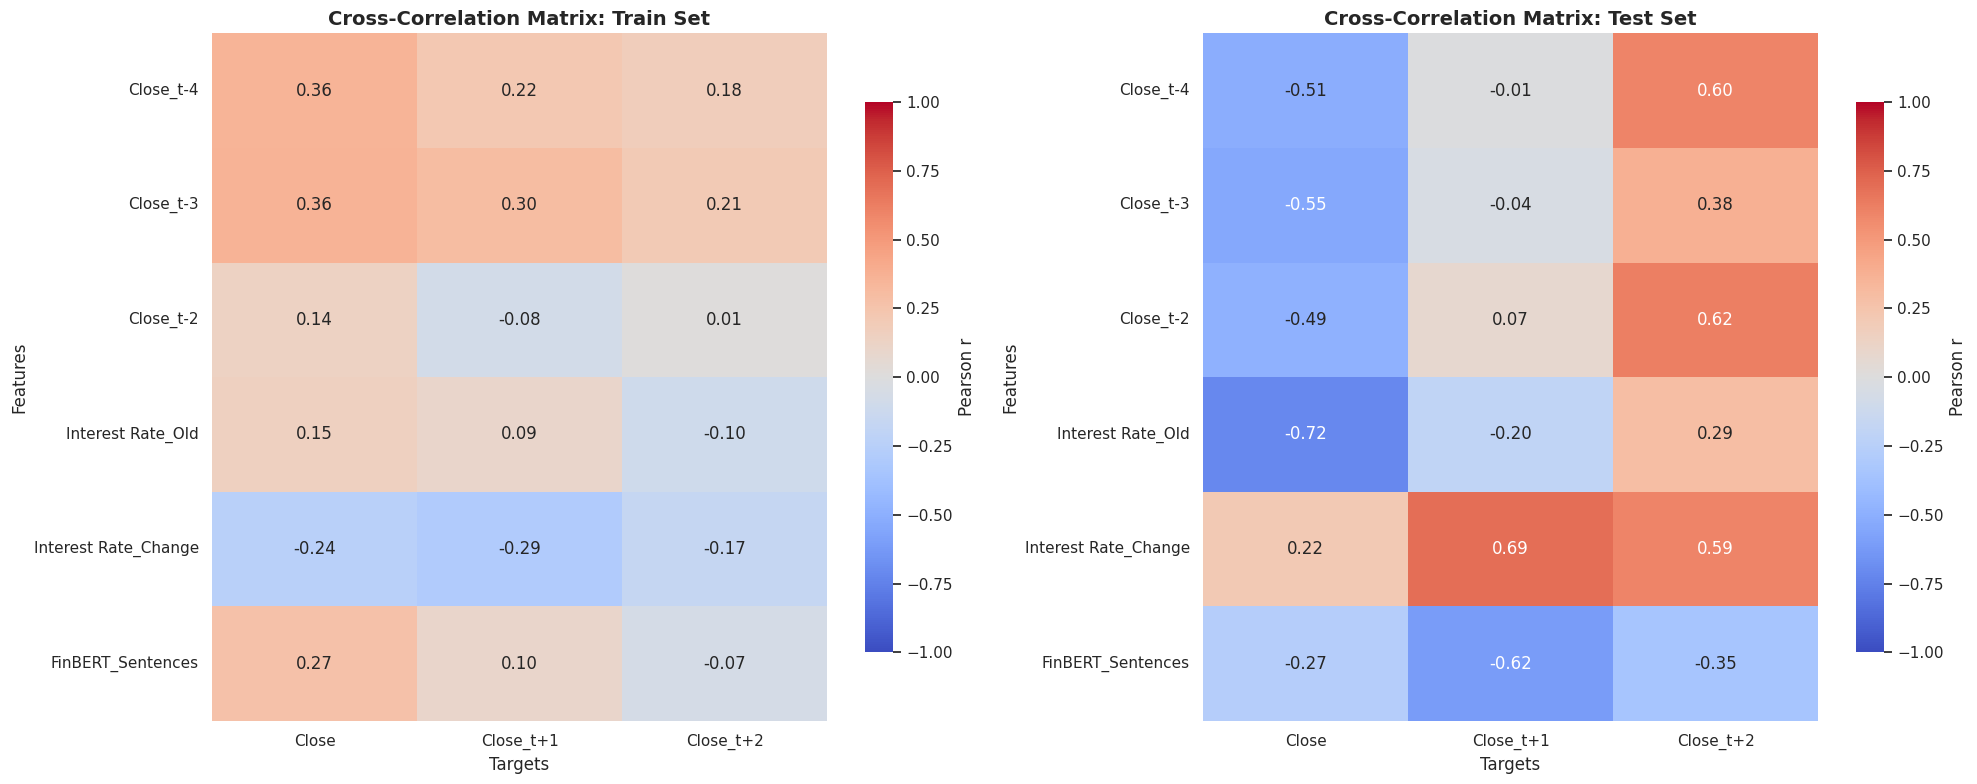

In [183]:
#HEATMAP XS
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Create directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# === CONFIGURATION ===
config = {
    'x_indices': [6,7,8],  # Column indices for X-axis (Targets)
    'y_indices': [0, 1, 2, 3, 4,5],  # Column indices for Y-axis (Features)
    'x_label': 'Targets',
    'y_label': 'Features',
    'figsize': (20, 8),
    'cmap': 'coolwarm',
    'annot': True,
    'fmt': '.2f',
    'vmin': -1,
    'vmax': 1
}

# Process train and test sets
datasets = {'Train Set': train_fin_sen, 'Test Set': test_fin_sen}

fig, axes = plt.subplots(1, 2, figsize=config['figsize'])

for ax, (name, dataset) in zip(axes, datasets.items()):
    # 1. Original DataFrame without MDAX/SDAX index columns
    df = dataset.loc[:, ~dataset.columns.str.startswith('Index_')]
    
    # 2. Complete column list
    columns_all = list(df.columns)
    
    # 3. Get column names for configured indices
    x_cols = [columns_all[i] for i in config['x_indices'] if i < len(columns_all)]
    y_cols = [columns_all[i] for i in config['y_indices'] if i < len(columns_all)]
    
    # 4. Create subset and calculate correlation
    df_subset = df[x_cols + y_cols].dropna()
    corr_matrix = df_subset.corr()
    # Only cross-correlation Y vs. X
    corr_xy = corr_matrix.loc[y_cols, x_cols]

    # 5. Plot
    sns.heatmap(
        corr_xy,
        annot=config['annot'],
        cmap=config['cmap'],
        vmin=config['vmin'], 
        vmax=config['vmax'],
        square=False,
        fmt=config['fmt'],
        cbar_kws={'shrink': 0.8, 'label': 'Pearson r'},
        ax=ax
    )
    ax.set_xlabel(config['x_label'])
    ax.set_ylabel(config['y_label'])
    ax.set_title(f"Cross-Correlation Matrix: {name}", fontsize=14, fontweight='bold')

plt.tight_layout()

# Save as PNG for download
plt.savefig('/kaggle/working/cross_correlation_heatmap_white_XS_traintest.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig('/kaggle/working/cross_correlation_heatmap_transparent_XS_traintest.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()


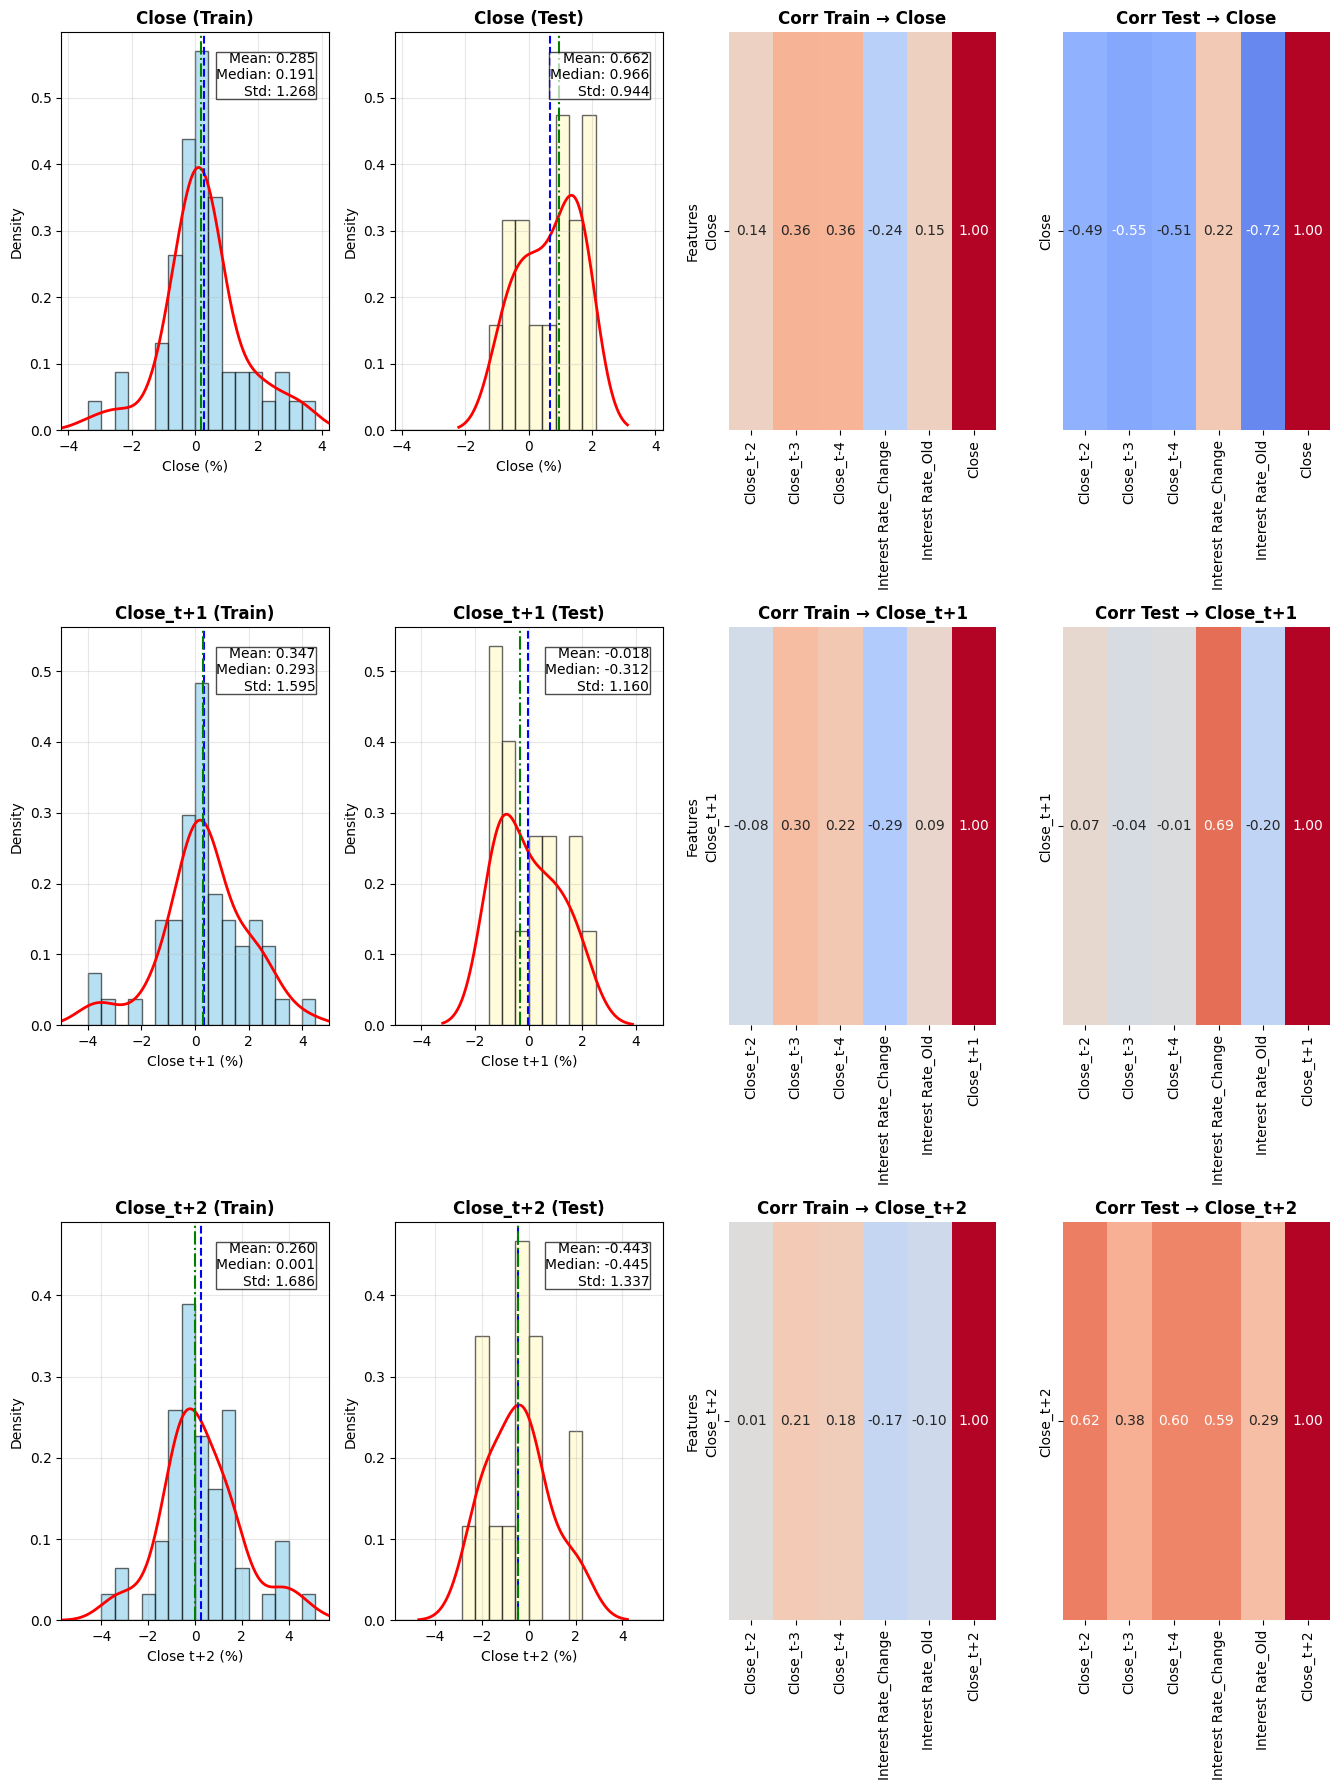

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Configuration
config = {
    'fig_scale': 0.9,
    'y_label'  : 'Density',
    'x_labels' : {
        'Close'    : 'Close (%)',
        'Close_t+1': 'Close t+1 (%)',
        'Close_t+2': 'Close t+2 (%)'
    },
    'x_pad': 0.20  # 10% Spielraum
}

# Figurengröße
fig_width, fig_height = 15 * config['fig_scale'], 20 * config['fig_scale']
target_cols = ['Close', 'Close_t+1', 'Close_t+2']

# Schnittmenge der Spalten in Train und Test
common_feats = set(train_set.columns).intersection(test_set.columns)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(fig_width, fig_height))

for i, col in enumerate(target_cols):
    # Für alle Features: entferne Index_*-Spalten und alle drei Zielvariablen
    features = sorted([
        c for c in common_feats
        if not c.startswith('Index_') and c not in target_cols
    ])

    data_tr = train_set[col].dropna()
    data_te = test_set[col].dropna()

    # X-Bereich symmetrisch um 0 mit Puffer
    max_abs = max(data_tr.abs().max(), data_te.abs().max()) * (1 + config['x_pad'])
    bins    = np.linspace(-max_abs, max_abs, 21)

    # Y-Max aus Histogrammdichten
    dens_tr, _ = np.histogram(data_tr, bins=bins, density=True)
    dens_te, _ = np.histogram(data_te, bins=bins, density=True)
    y_max = max(dens_tr.max(), dens_te.max()) * 1.05

    # Spalten 0 & 1: Histogramm + KDE für Train/Test
    for j, ds in enumerate((data_tr, data_te)):
        ax = axes[i, j]
        color = 'skyblue' if j == 0 else '#FFF9C4'
        ax.hist(ds, bins=bins, density=True, alpha=0.6, color=color, edgecolor='black')
        ds.plot.kde(ax=ax, color='red', linewidth=2)
        m, med, s = ds.mean(), ds.median(), ds.std(ddof=1)
        ax.axvline(m,   color='blue',  linestyle='--', linewidth=1.5)
        ax.axvline(med, color='green', linestyle='-.', linewidth=1.5)
        ax.set_xlim(-max_abs, max_abs)
        ax.set_ylim(0, y_max)
        split = 'Train' if j == 0 else 'Test'
        ax.set_title(f'{col} ({split})', fontweight='bold')
        ax.set_xlabel(config['x_labels'][col])
        ax.set_ylabel(config['y_label'])
        ax.text(
            0.95, 0.95,
            f"Mean: {m:.3f}\nMedian: {med:.3f}\nStd: {s:.3f}",
            transform=ax.transAxes,
            ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.7, pad=0.3)
        )
        ax.grid(alpha=0.3)

    # Spalte 2: Korrelations-Heatmap für Train-Set
    ax_tr = axes[i, 2]
    corr_tr = train_set[features + [col]].corr()[[col]].T
    sns.heatmap(
        corr_tr,
        annot=True, fmt='.2f',
        cmap='coolwarm', vmin=-1, vmax=1,
        cbar=False, ax=ax_tr
    )
    ax_tr.set_title(f'Corr Train → {col}', fontweight='bold')
    ax_tr.set_xlabel(''); ax_tr.set_ylabel('Features')

    # Spalte 3: Korrelations-Heatmap für Test-Set
    ax_te = axes[i, 3]
    corr_te = test_set[features + [col]].corr()[[col]].T
    sns.heatmap(
        corr_te,
        annot=True, fmt='.2f',
        cmap='coolwarm', vmin=-1, vmax=1,
        cbar=False, ax=ax_te
    )
    ax_te.set_title(f'Corr Test → {col}', fontweight='bold')
    ax_te.set_xlabel(''); ax_te.set_ylabel('')

plt.tight_layout()
plt.show()


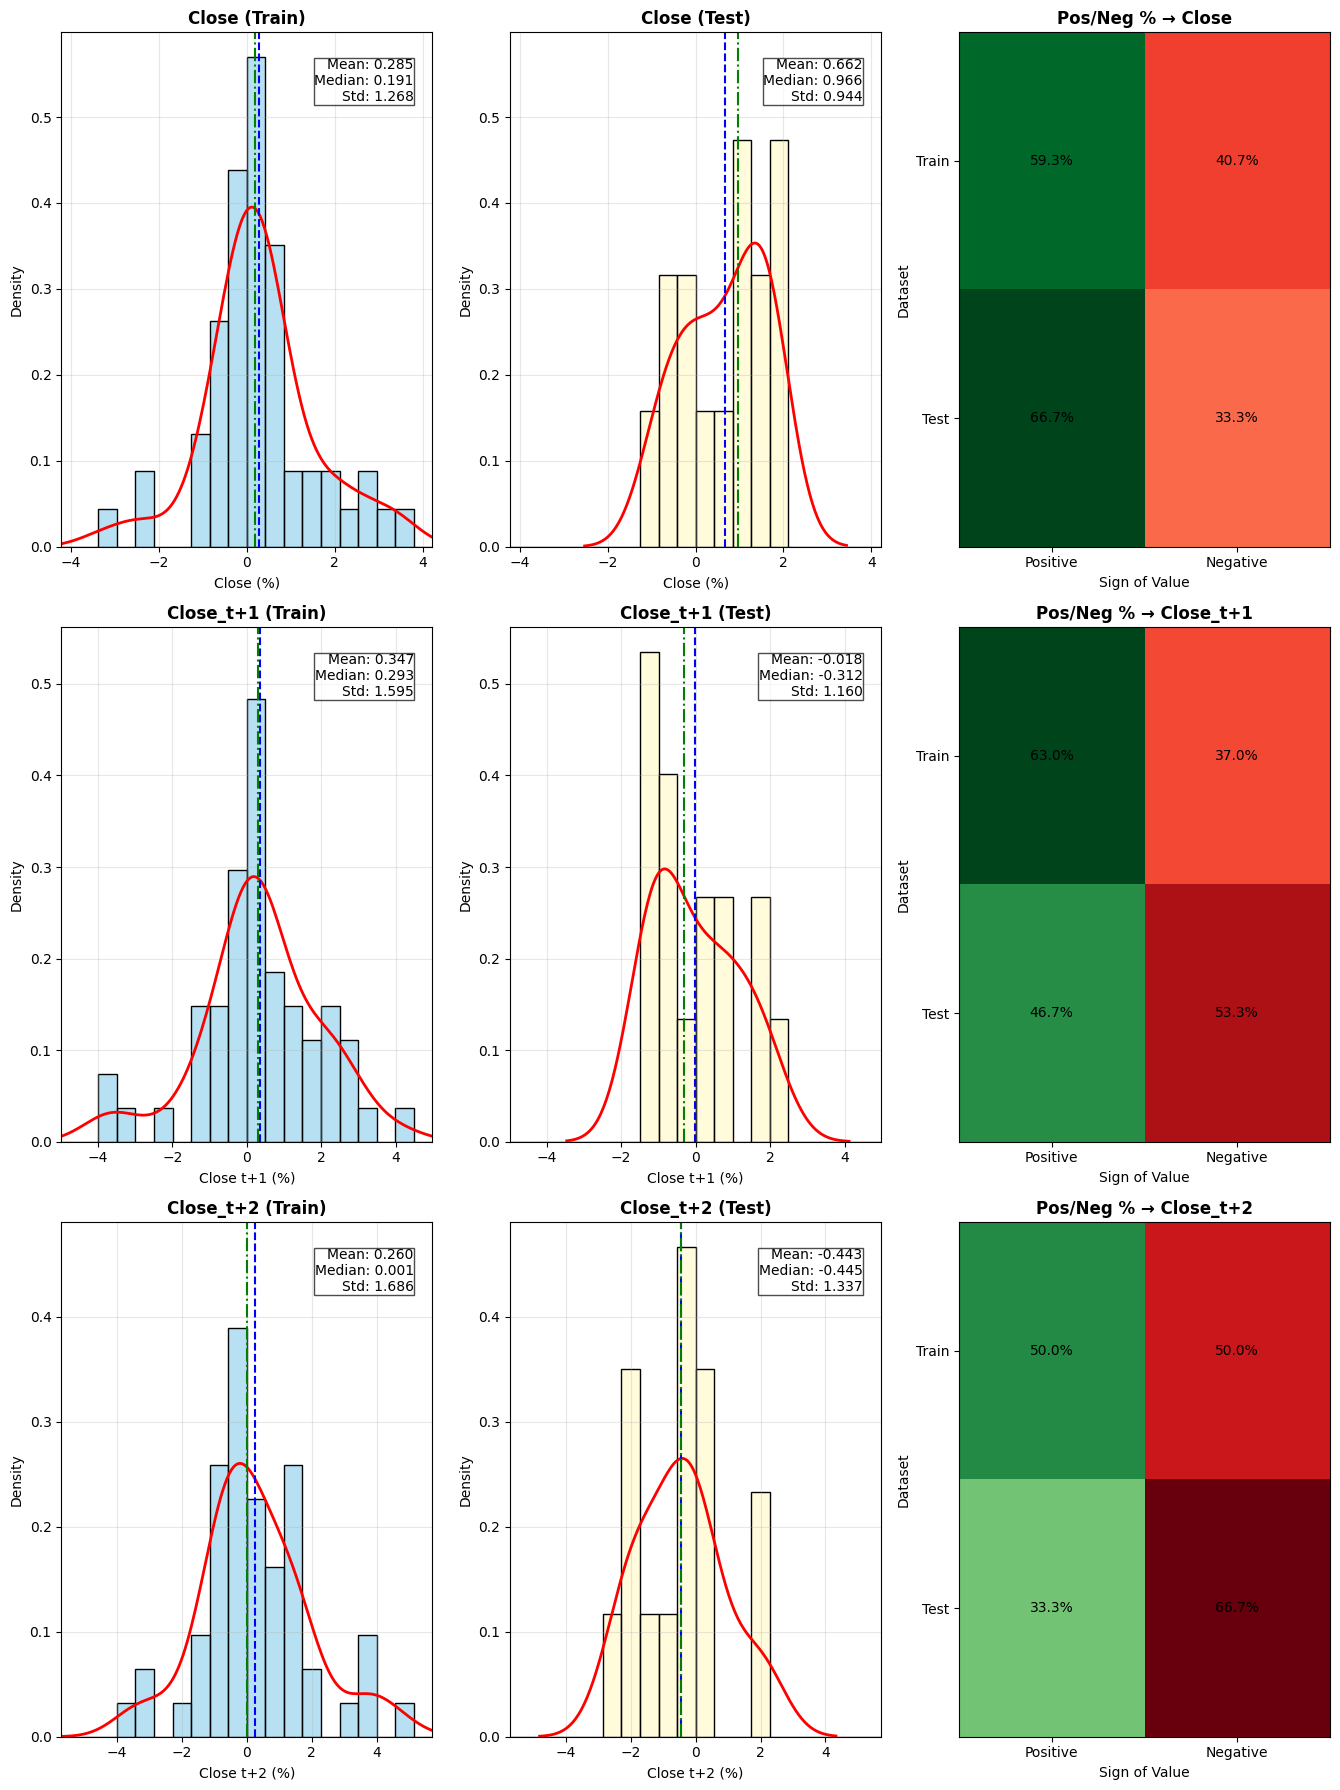

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Configuration
config = {
    'fig_scale': 0.9,
    'y_label': 'Density',
    'x_labels': {
        'Close': 'Close (%)',
        'Close_t+1': 'Close t+1 (%)',
        'Close_t+2': 'Close t+2 (%)'
    },
    'x_pad': 0.20  # 10% Puffer um den Max-Absolutwert
}

# Figurengröße
fig_width  = 15 * config['fig_scale']
fig_height = 20 * config['fig_scale']

# Zielvariablen
target_cols = ['Close', 'Close_t+1', 'Close_t+2']

# Schnapp dir alle gemeinsamen Features außer Index_*-Spalten und Zielvariablen
common_feats = set(train_set.columns).intersection(test_set.columns)
features = sorted([
    c for c in common_feats
    if not c.startswith('Index_') and c not in target_cols
])

# Setup 3×3 Grid: Spalten 0+1 = Hist+KDE, Spalte 2 = Pos/Neg-Heatmap in %
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(fig_width, fig_height))

for i, col in enumerate(target_cols):
    data_tr = train_set[col].dropna()
    data_te = test_set[col].dropna()

    # X-Bereich symmetrisch um 0 mit Puffer
    max_abs = max(data_tr.abs().max(), data_te.abs().max()) * (1 + config['x_pad'])
    bins = np.linspace(-max_abs, max_abs, 21)

    # Y-Max aus Histogrammdichten
    dens_tr, _ = np.histogram(data_tr, bins=bins, density=True)
    dens_te, _ = np.histogram(data_te, bins=bins, density=True)
    y_max = max(dens_tr.max(), dens_te.max()) * 1.05

    # Spalten 0+1: Histogramm + KDE für Train/Test
    for j, ds in enumerate((data_tr, data_te)):
        ax = axes[i, j]
        color = 'skyblue' if j == 0 else '#FFF9C4'
        sns.histplot(ds, bins=bins, stat='density', kde=False,
                     color=color, edgecolor='black', alpha=0.6, ax=ax)
        sns.kdeplot(ds, color='red', linewidth=2, ax=ax)

        m, med, s = ds.mean(), ds.median(), ds.std(ddof=1)
        ax.axvline(m, color='blue', linestyle='--', linewidth=1.5)
        ax.axvline(med, color='green', linestyle='-.', linewidth=1.5)

        ax.set_xlim(-max_abs, max_abs)
        ax.set_ylim(0, y_max)

        split = 'Train' if j == 0 else 'Test'
        ax.set_title(f'{col} ({split})', fontweight='bold')
        ax.set_xlabel(config['x_labels'][col])
        ax.set_ylabel(config['y_label'])
        ax.text(
            0.95, 0.95,
            f"Mean: {m:.3f}\nMedian: {med:.3f}\nStd: {s:.3f}",
            transform=ax.transAxes, ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.7, pad=0.3)
        )
        ax.grid(alpha=0.3)

    # Spalte 2: Pos/Neg Heatmap in % (je Zeile auf 100% normiert)
    ax_heat = axes[i, 2]
    tr_total = len(data_tr)
    te_total = len(data_te)
    percent_df = pd.DataFrame({
        'Positive (%)': [data_tr.gt(0).sum() / tr_total * 100,
                         data_te.gt(0).sum() / te_total * 100],
        'Negative (%)': [data_tr.le(0).sum() / tr_total * 100,
                         data_te.le(0).sum() / te_total * 100]
    }, index=['Train', 'Test'])

    # Heatmap mit getrennter Grün/Rot-Skala über Spalten
    # Wir bauen ein 2×2 Farbarray manuell:
    max_pct = percent_df.values.max() / 100.0
    colors = np.zeros((2, 2, 4))
    for r in range(2):
        for c, col_name in enumerate(percent_df.columns):
            val = percent_df.iloc[r, c] / 100.0 / max_pct
            if 'Positive' in col_name:
                colors[r, c] = plt.cm.Greens(val)
            else:
                colors[r, c] = plt.cm.Reds(val)

    ax_heat.imshow(colors, aspect='auto')
    for (r, c), txt in np.ndenumerate(percent_df.values):
        ax_heat.text(c, r, f"{txt:.1f}%", ha='center', va='center',
                     color='black', fontsize=10)

    ax_heat.set_xticks([0, 1])
    ax_heat.set_xticklabels(['Positive', 'Negative'])
    ax_heat.set_yticks([0, 1])
    ax_heat.set_yticklabels(['Train', 'Test'])
    ax_heat.set_title(f'Pos/Neg % → {col}', fontweight='bold')
    ax_heat.set_xlabel('Sign of Value')
    ax_heat.set_ylabel('Dataset')
    ax_heat.grid(False)

plt.tight_layout()
plt.show()


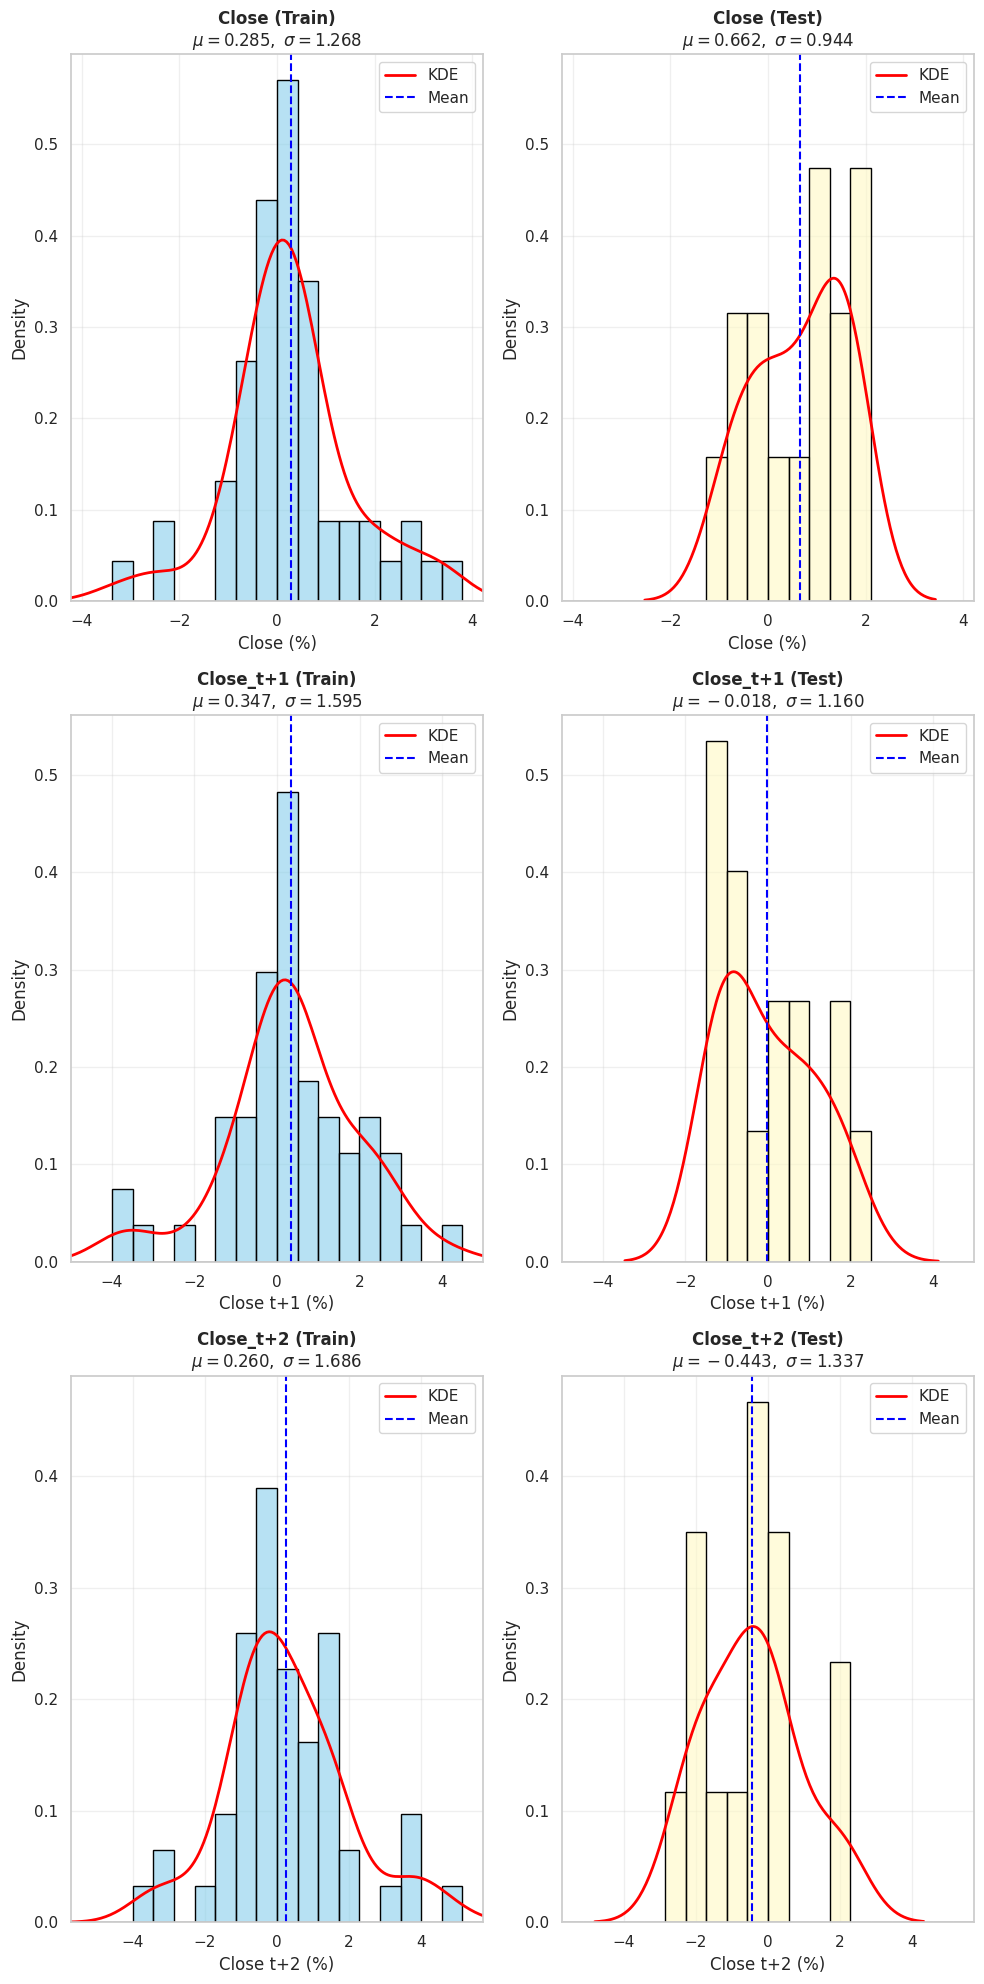

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

# Create directory if it doesn't exist
os.makedirs('/kaggle/working', exist_ok=True)

# Configuration
config = {
    'fig_scale': 1.0,
    'y_label': 'Density',
    'x_labels': {
        'Close': 'Close (%)',
        'Close_t+1': 'Close t+1 (%)',
        'Close_t+2': 'Close t+2 (%)'
    },
    'x_pad': 0.20  # 20% Puffer um den Max-Absolutwert
}

# Figurengröße
fig_width  = 10 * config['fig_scale']  # Reduziert da nur 2 Spalten
fig_height = 20 * config['fig_scale']

# Zielvariablen
target_cols = ['Close', 'Close_t+1', 'Close_t+2']

# Schnapp dir alle gemeinsamen Features außer Index_*-Spalten und Zielvariablen
common_feats = set(train_set.columns).intersection(test_set.columns)
features = sorted([
    c for c in common_feats
    if not c.startswith('Index_') and c not in target_cols
])

# Setup 3×2 Grid: Spalten 0+1 = Hist+KDE für Train/Test
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(fig_width, fig_height))

for i, col in enumerate(target_cols):
    data_tr = train_set[col].dropna()
    data_te = test_set[col].dropna()

    # X-Bereich symmetrisch um 0 mit Puffer
    max_abs = max(data_tr.abs().max(), data_te.abs().max()) * (1 + config['x_pad'])
    bins = np.linspace(-max_abs, max_abs, 21)

    # Y-Max aus Histogrammdichten
    dens_tr, _ = np.histogram(data_tr, bins=bins, density=True)
    dens_te, _ = np.histogram(data_te, bins=bins, density=True)
    y_max = max(dens_tr.max(), dens_te.max()) * 1.05

    # Spalten 0+1: Histogramm + KDE für Train/Test
    for j, ds in enumerate((data_tr, data_te)):
        ax = axes[i, j]
        color = 'skyblue' if j == 0 else '#FFF9C4'
        sns.histplot(ds, bins=bins, stat='density', kde=False,
                     color=color, edgecolor='black', alpha=0.6, ax=ax)
        sns.kdeplot(ds, color='red', linewidth=2, ax=ax, label='KDE')

        m, s = ds.mean(), ds.std(ddof=1)
        ax.axvline(m, color='blue', linestyle='--', linewidth=1.5, label='Mean')

        ax.set_xlim(-max_abs, max_abs)
        ax.set_ylim(0, y_max)

        split = 'Train' if j == 0 else 'Test'
        # Add mean and std with formula under title
        ax.set_title(f'{col} ({split})\n$\mu={m:.3f},\ \sigma={s:.3f}$', fontweight='bold')
        ax.set_xlabel(config['x_labels'][col])
        ax.set_ylabel(config['y_label'])
        
        # Add legend for KDE and Mean
        ax.legend()
        
        ax.grid(alpha=0.3)

plt.tight_layout()

# Save with white background
plt.savefig('/kaggle/working/target_distributions_white.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

# Save with transparent background
plt.savefig('/kaggle/working/target_distributions_transparent.png', dpi=300, bbox_inches='tight', 
            transparent=True, edgecolor='none')

plt.show()
